In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

#import warnings
#warnings.filterwarnings("ignore")

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [2]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

#### Fixing messy column names (containing spaces) for ease of use

In [3]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '').str.replace('.', '').str.replace('-', '_')

C:\Users\cools\AppData\Local\Temp/ipykernel_6940/830596242.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '').str.replace('.', '').str.replace('-', '_')


#### Checking top 5 rows again

In [4]:
Company.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [5]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [6]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
 

#### Checking datatype of all columns

In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [8]:
Company.describe()

Co_Code  Networth_Next_Year  Equity_Paid_Up      Networth  \
count   3586.000000         3586.000000     3586.000000   3586.000000   
mean   16065.388734          725.045251       62.966584    649.746299   
std    19776.817379         4769.681004      778.761744   4091.988792   
min        4.000000        -8021.600000        0.000000  -7027.480000   
25%     3029.250000            3.985000        3.750000      3.892500   
50%     6077.500000           19.015000        8.290000     18.580000   
75%    24269.500000          123.802500       19.517500    117.297500   
max    72493.000000       111729.100000    42263.460000  81657.350000   

       Capital_Employed     Total_Debt   Gross_Block_  Net_Working_Capital_  \
count       3586.000000    3586.000000    3586.000000           3586.000000   
mean        2799.611054    1994.823779     594.178829            410.809665   
std        26975.135385   23652.842746    4871.547802           6301.218546   
min        -1824.750000      -0.720000     -41.190000         -13162.420000   
25%            7.602500       0.030000       0.570000              0.942500   
50%           39.090000       7.490000      15.870000             10.145000   
75%          226.605000      72.350000     131.895000             61.175000   
max       714001.250000  652823.810000  128477.590000         223257.560000   

       Current_Assets_  Current_Liabilities_and_Provisions_  ...  \
count      3586.000000                          3586.000000  ...   
mean       1960.349172                           391.992078  ...   
std       22577.570829                          2675.001631  ...   
min          -0.910000                            -0.230000  ...   
25%           4.000000                             0.732500  ...   
50%          24.540000                             9.225000  ...   
75%         135.277500                            65.650000  ...   
max      721166.000000                         83232.980000  ...   

       PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  \
count         3585.000000        3585.000000        3585.000000   
mean           -51.162890        -109.213414        -311.570357   
std           1795.131025        3057.635870       10921.592639   
min         -78870.450000     -141600.000000     -590500.000000   
25%              0.000000           0.000000           0.000000   
50%              8.070000           5.230000           4.690000   
75%             18.990000          14.290000          14.110000   
max          19233.330000       19195.700000       15640.000000   

       CPM_perc_Latest  APATM_perc_Latest  Debtors_Velocity_Days  \
count      3585.000000        3585.000000            3586.000000   
mean       -307.005632        -365.056187             603.894032   
std       10676.149629       12500.051387           10636.759580   
min     -572000.000000     -688600.000000               0.000000   
25%           0.000000           0.000000               8.000000   
50%           3.890000           1.590000              49.000000   
75%          11.390000           7.410000             106.000000   
max       15640.000000       15266.670000          514721.000000   

       Creditors_Velocity_Days  Inventory_Velocity_Days  \
count             3.586000e+03              3483.000000   
mean              2.057855e+03                79.644559   
std               5.416948e+04               137.847792   
min               0.000000e+00              -199.000000   
25%               8.000000e+00                 0.000000   
50%               3.900000e+01                35.000000   
75%               8.900000e+01                96.000000   
max               2.034145e+06               996.000000   

       Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
count                      3586.000000                     3586.000000  
mean                          0.819757                       61.884548  
std                           1.201400                      9

In [9]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

Co_Code  Networth_Next_Year  Equity_Paid_Up  Networth  \
count  3586.00             3586.00         3586.00   3586.00   
mean  16065.39              725.05           62.97    649.75   
std   19776.82             4769.68          778.76   4091.99   
min       4.00            -8021.60            0.00  -7027.48   
25%    3029.25                3.98            3.75      3.89   
50%    6077.50               19.02            8.29     18.58   
75%   24269.50              123.80           19.52    117.30   
max   72493.00           111729.10        42263.46  81657.35   

       Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
count           3586.00     3586.00       3586.00               3586.00   
mean            2799.61     1994.82        594.18                410.81   
std            26975.14    23652.84       4871.55               6301.22   
min            -1824.75       -0.72        -41.19             -13162.42   
25%                7.60        0.03          0.57                  0.94   
50%               39.09        7.49         15.87                 10.14   
75%              226.60       72.35        131.90                 61.17   
max           714001.25   652823.81     128477.59             223257.56   

       Current_Assets_  Current_Liabilities_and_Provisions_  ...  \
count          3586.00                              3586.00  ...   
mean           1960.35                               391.99  ...   
std           22577.57                              2675.00  ...   
min              -0.91                                -0.23  ...   
25%               4.00                                 0.73  ...   
50%              24.54                                 9.23  ...   
75%             135.28                                65.65  ...   
max          721166.00                             83232.98  ...   

       PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  \
count             3585.00            3585.00            3585.00   
mean               -51.16            -109.21            -311.57   
std               1795.13            3057.64           10921.59   
min             -78870.45         -141600.00         -590500.00   
25%                  0.00               0.00               0.00   
50%                  8.07               5.23               4.69   
75%                 18.99              14.29              14.11   
max              19233.33           19195.70           15640.00   

       CPM_perc_Latest  APATM_perc_Latest  Debtors_Velocity_Days  \
count          3585.00            3585.00                3586.00   
mean           -307.01            -365.06                 603.89   
std           10676.15           12500.05               10636.76   
min         -572000.00         -688600.00                   0.00   
25%               0.00               0.00                   8.00   
50%               3.89               1.59                  49.00   
75%              11.39               7.41                 106.00   
max           15640.00           15266.67              514721.00   

       Creditors_Velocity_Days  Inventory_Velocity_Days  \
count                  3586.00                  3483.00   
mean                   2057.85                    79.64   
std                   54169.48                   137.85   
min                       0.00                  -199.00   
25%                       8.00                     0.00   
50%                      39.00                    35.00   
75%                      89.00                    96.00   
max                 2034145.00                   996.00   

       Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
count                          3586.00                         3586.00  
mean                              0.82                           61.88  
std                               1.20                          976.82  
min                              -0.33                          -61.00  
25%                        

#### Lets check for missing values in the dataset

In [10]:
Company.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Debtors_Velocity_Days                0
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
Length: 67, dtype: int64

In [11]:
Company.size

240262

In [12]:
Company.isnull().sum().sum()

118

There are missing values in the dataset

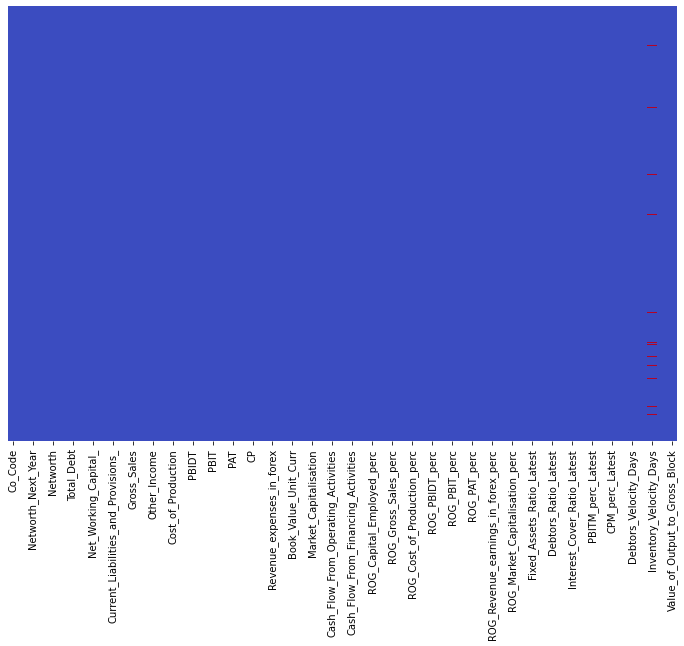

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(Company.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [14]:
Company

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0       16974      Hind.Cables            -8021.60          419.36  -7027.48   
1       21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2       14852     ABG Shipyard            -3192.58           53.84    506.86   
3        2439              GTL            -3054.51          157.30   -623.49   
4       23505  Bharati Defence            -2967.36           50.30  -1070.83   
...       ...              ...                 ...             ...       ...   
3581     4987        HDFC Bank            72677.77          501.30  62009.42   
3582      502          Vedanta            79162.19          296.50  34057.87   
3583    12002          I O C L            88134.31         2427.95  67969.97   
3584    12001             NTPC            91293.70         8245.46  81657.35   
3585    15542    Bharti Airtel           111729.10         1998.70  78270.80   

      Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0             -1007.24     5936.03        474.30              -1076.34   
1              4458.20     7410.18       9070.86              -1098.88   
2              7714.68     6944.54       1281.54               4496.25   
3              2353.88     2326.05       1033.69              -2612.42   
4              4675.33     5740.90       1084.20               1836.23   
...                ...         ...           ...                   ...   
3581         590576.00   496009.19       8463.30                  0.00   
3582          71906.06    37643.79      29848.44               2503.86   
3583         140686.75    55245.01     121643.45               6376.84   
3584         173099.14    85995.34     128477.59              11449.79   
3585         104241.00    21569.70     100084.90             -12145.30   

      Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0               40.50  ...                0.00               0.00   
1              486.86  ...              -10.30             -39.74   
2             9097.64  ...            -5279.14           -5516.98   
3             1034.12  ...               -3.33              -7.21   
4             4685.81  ...             -295.55            -400.55   
...               ...  ...                 ...                ...   
3581        444633.50  ...                0.00               0.00   
3582         11554.45  ...               39.92              32.17   
3583         89609.82  ...                8.09               6.69   
3584         42353.59  ...               28.12              20.55   
3585         11947.10  ...               42.47              22.88   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0                  0.00             0.00               0.00   
1                -57.74           -57.74             -87.18   
2              -7780.25         -7723.67           -7961.51   
3                -48.13           -47.70             -51.58   
4               -845.88           379.79             274.79   
...                 ...              ...                ...   
3581               0.00             0.00               0.00   
3582              29.81            30.52              22.77   
3583               7.31             5.69               4.29   
3584              23.39            19.55              11.99   
3585              34.04            25.97               6.37   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                         0                        0                    45.00   
1                        29                      101                     2.00   
2                        97                      558                     0.00   
3                        93                       63                     2.00   
4                      3887                      346                     0.00   
...                     ...                      ...                      ...   
358

#### Let's check the number of outliers per column

In [15]:
Q1 = Company.quantile(0.25)
Q3 = Company.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [16]:
UL

Co_Code                           56129.88
Networth_Next_Year                  303.53
Equity_Paid_Up                       43.17
Networth                            287.41
Capital_Employed                    555.11
                                    ...   
Debtors_Velocity_Days               253.00
Creditors_Velocity_Days             210.50
Inventory_Velocity_Days             240.00
Value_of_Output_to_Total_Assets       2.79
Value_of_Output_to_Gross_Block       11.87
Length: 66, dtype: float64

In [17]:
Company

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0       16974      Hind.Cables            -8021.60          419.36  -7027.48   
1       21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2       14852     ABG Shipyard            -3192.58           53.84    506.86   
3        2439              GTL            -3054.51          157.30   -623.49   
4       23505  Bharati Defence            -2967.36           50.30  -1070.83   
...       ...              ...                 ...             ...       ...   
3581     4987        HDFC Bank            72677.77          501.30  62009.42   
3582      502          Vedanta            79162.19          296.50  34057.87   
3583    12002          I O C L            88134.31         2427.95  67969.97   
3584    12001             NTPC            91293.70         8245.46  81657.35   
3585    15542    Bharti Airtel           111729.10         1998.70  78270.80   

      Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0             -1007.24     5936.03        474.30              -1076.34   
1              4458.20     7410.18       9070.86              -1098.88   
2              7714.68     6944.54       1281.54               4496.25   
3              2353.88     2326.05       1033.69              -2612.42   
4              4675.33     5740.90       1084.20               1836.23   
...                ...         ...           ...                   ...   
3581         590576.00   496009.19       8463.30                  0.00   
3582          71906.06    37643.79      29848.44               2503.86   
3583         140686.75    55245.01     121643.45               6376.84   
3584         173099.14    85995.34     128477.59              11449.79   
3585         104241.00    21569.70     100084.90             -12145.30   

      Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0               40.50  ...                0.00               0.00   
1              486.86  ...              -10.30             -39.74   
2             9097.64  ...            -5279.14           -5516.98   
3             1034.12  ...               -3.33              -7.21   
4             4685.81  ...             -295.55            -400.55   
...               ...  ...                 ...                ...   
3581        444633.50  ...                0.00               0.00   
3582         11554.45  ...               39.92              32.17   
3583         89609.82  ...                8.09               6.69   
3584         42353.59  ...               28.12              20.55   
3585         11947.10  ...               42.47              22.88   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0                  0.00             0.00               0.00   
1                -57.74           -57.74             -87.18   
2              -7780.25         -7723.67           -7961.51   
3                -48.13           -47.70             -51.58   
4               -845.88           379.79             274.79   
...                 ...              ...                ...   
3581               0.00             0.00               0.00   
3582              29.81            30.52              22.77   
3583               7.31             5.69               4.29   
3584              23.39            19.55              11.99   
3585              34.04            25.97               6.37   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                         0                        0                    45.00   
1                        29                      101                     2.00   
2                        97                      558                     0.00   
3                        93                       63                     2.00   
4                      3887                      346                     0.00   
...                     ...                      ...                      ...   
358

In [18]:
((Company > UL) | (Company < LL)).sum().head(60)

C:\Users\cools\AppData\Local\Temp/ipykernel_6940/301009050.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((Company > UL) | (Company < LL)).sum().head(60)


APATM_perc_Latest                       933
Adjusted_PAT                            954
Book_Value_Adj_Unit_Curr                486
Book_Value_Unit_Curr                    485
CEPS_annualised_Unit_Curr               602
CP                                      816
CPM_perc_Latest                         720
Capital_Employed                        596
Capital_expenses_in_forex               694
Cash_Flow_From_Financing_Activities    1005
Cash_Flow_From_Investing_Activities     876
Cash_Flow_From_Operating_Activities     801
Co_Code                                 291
Co_Name                                   0
Cost_of_Production                      560
Creditors_Velocity_Days                 391
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Current_Ratio_Latest                    565
Debtors_Ratio_Latest                    371
Debtors_Velocity_Days                   398
Equity_Paid_Up                          448
Fixed_Assets_Ratio_Latest       

In [19]:
((Company > UL) | (Company < LL)).sum()['Networth_Next_Year']

C:\Users\cools\AppData\Local\Temp/ipykernel_6940/2491501179.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((Company > UL) | (Company < LL)).sum()['Networth_Next_Year']


676

In [20]:
((Company > UL) | (Company < LL)).sum().sum()

C:\Users\cools\AppData\Local\Temp/ipykernel_6940/2293488041.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((Company > UL) | (Company < LL)).sum().sum()


42322

In [21]:
Company[((Company.drop('Networth_Next_Year',axis=1) > UL) | (Company.drop('Networth_Next_Year',axis=1) < LL))]= np.nan

C:\Users\cools\AppData\Local\Temp/ipykernel_6940/432807081.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Company[((Company.drop('Networth_Next_Year',axis=1) > UL) | (Company.drop('Networth_Next_Year',axis=1) < LL))]= np.nan


In [22]:
Company.isnull().sum()

Co_Code                            291
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [23]:
Company.isnull().sum().sum()

41764

In [24]:
Company.shape

(3586, 67)

In [25]:
Company = Company.drop(['Co_Code', 'Co_Name'], axis = 1)

In [26]:
Company_sub1 = Company.copy()

#### Let's visually inspect the missing values in our data

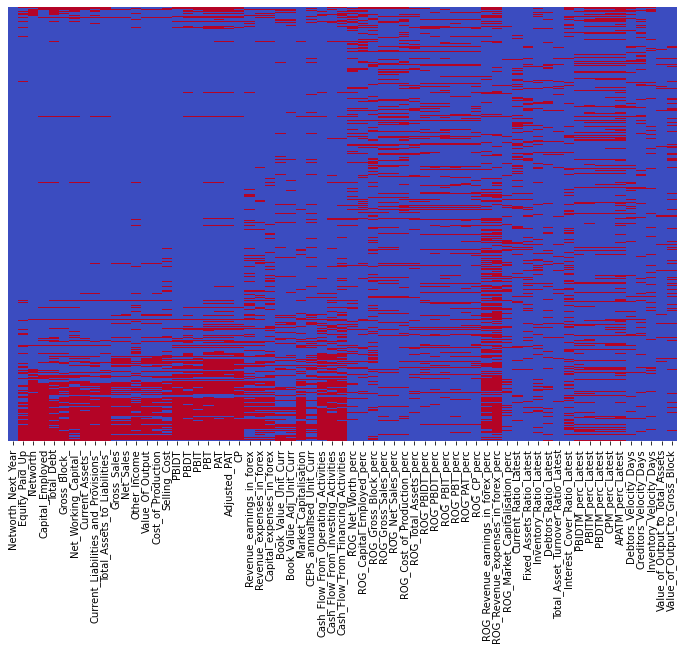

In [27]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [28]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

#### Let's filter the data which is 90% or more complete at the row level

In [29]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [30]:
Company_sub1_temp.shape

(1203, 65)

In [31]:
df_temp = pd.DataFrame(Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size)
df_temp

0
ROG_Revenue_expenses_in_forex_perc  0.45
ROG_Revenue_earnings_in_forex_perc  0.37
Cash_Flow_From_Financing_Activities 0.28
PAT                                 0.27
Adjusted_PAT                        0.27
...                                  ...
Debtors_Ratio_Latest                0.10
Inventory_Velocity_Days             0.10
Total_Asset_Turnover_Ratio_Latest   0.06
Value_of_Output_to_Total_Assets     0.04
Networth_Next_Year                  0.00

[65 rows x 1 columns]

In [32]:
df_temp[df_temp[0]>0.30].index

Index(['ROG_Revenue_expenses_in_forex_perc', 'ROG_Revenue_earnings_in_forex_perc'], dtype='object')

#### Dropping columns with more than 30% missing values 

In [33]:
Company_sub2 = Company_sub1.drop(df_temp[df_temp[0]>0.30].index, axis = 1)

In [34]:
Company_sub2.shape

(3586, 63)

#### Segregate the predictors and response 

In [35]:
predictors = Company_sub2.drop('Networth_Next_Year', axis = 1)
response = Company_sub2['Networth_Next_Year']

#### Scale the predictors 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [37]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [38]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [39]:
imputer = KNNImputer(n_neighbors=10)

In [40]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3.drop('Networth_Next_Year',axis=1)), columns = Company_sub3.columns.drop('Networth_Next_Year'))

In [41]:
Company_imputed.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block_                       0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
Length: 62, dtype: int64

#### Inspect possible correlations between independent variables 

<AxesSubplot:>

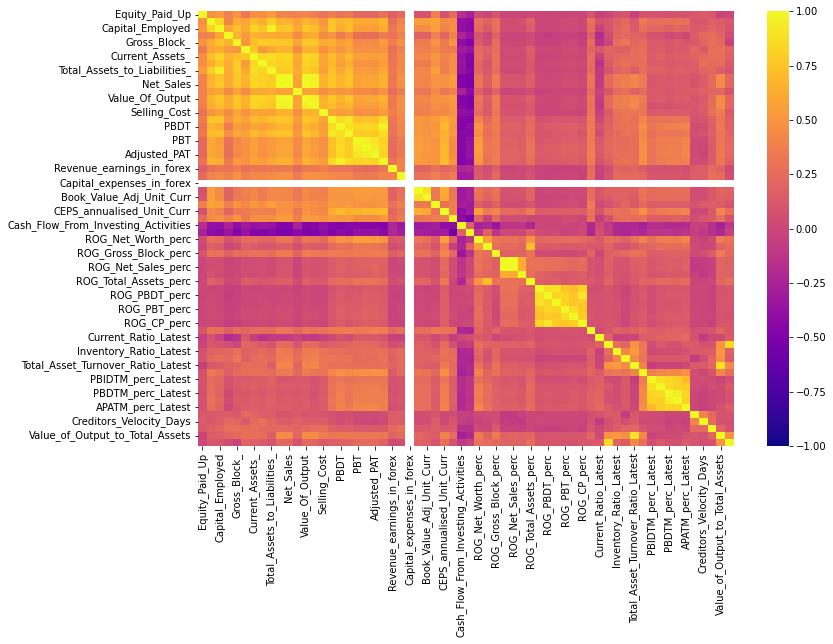

In [42]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [43]:
Company_imputed = Company_imputed.drop('Capital_expenses_in_forex', axis = 1)

In [44]:
cor_matrix

Equity_Paid_Up  Networth  Capital_Employed  \
Equity_Paid_Up                             1.00      0.47              0.52   
Networth                                   0.47      1.00              0.83   
Capital_Employed                           0.52      0.83              1.00   
Total_Debt                                 0.38      0.41              0.62   
Gross_Block_                               0.48      0.62              0.75   
...                                         ...       ...               ...   
Debtors_Velocity_Days                      0.12      0.11              0.13   
Creditors_Velocity_Days                    0.14      0.11              0.15   
Inventory_Velocity_Days                    0.11      0.16              0.21   
Value_of_Output_to_Total_Assets           -0.02      0.15              0.16   
Value_of_Output_to_Gross_Block            -0.01      0.11              0.10   

                                 Total_Debt  Gross_Block_  \
Equity_Paid_Up                         0.38          0.48   
Networth                               0.41          0.62   
Capital_Employed                       0.62          0.75   
Total_Debt                             1.00          0.66   
Gross_Block_                           0.66          1.00   
...                                     ...           ...   
Debtors_Velocity_Days                  0.16          0.12   
Creditors_Velocity_Days                0.22          0.21   
Inventory_Velocity_Days                0.27          0.27   
Value_of_Output_to_Total_Assets        0.20          0.23   
Value_of_Output_to_Gross_Block         0.04         -0.03   

                                 Net_Working_Capital_  Current_Assets_  \
Equity_Paid_Up                                   0.33             0.47   
Networth                                         0.59             0.71   
Capital_Employed                                 0.63             0.83   
Total_Debt                                       0.54             0.66   
Gross_Block_                                     0.50             0.73   
...                                               ...              ...   
Debtors_Velocity_Days                            0.22             0.20   
Creditors_Velocity_Days                          0.13             0.23   
Inventory_Velocity_Days                          0.27             0.27   
Value_of_Output_to_Total_Assets                  0.28             0.26   
Value_of_Output_to_Gross_Block                   0.20             0.17   

                                 Current_Liabilities_and_Provisions_  \
Equity_Paid_Up                                                  0.47   
Networth                                                        0.64   
Capital_Employed                                                0.76   
Total_Debt                                                      0.62   
Gross_Block_                                                    0.77   
...                                                              ...   
Debtors_Velocity_Days                                           0.16   
Creditors_Velocity_Days                                         0.28   
Inventory_Velocity_Days                                         0.24   
Value_of_Output_to_Total_Assets                                 0.26   
Value_of_Output_to_Gross_Block                                  0.13   

                                 Total_Assets_to_Liabilities_  Gross_Sales  \
Equity_Paid_Up                                           0.54         0.40   
Networth                                                 0.80         0.66   
Capital_Employed                                         0.94         0.76   
Total_Debt                                               0.63         0.62   
Gross_Block_                                             0.78         0.76   
...                                                       ...          ...   
Debtors_Velocity_Days                              

In [45]:
for tag in cor_matrix:
    for tag1 in cor_matrix:
        if tag!=tag1:
            if cor_matrix.loc[tag,tag1] >0.99:
                print(tag,'--',tag1,'\n')

Gross_Sales -- Net_Sales 

Gross_Sales -- Value_Of_Output 

Net_Sales -- Gross_Sales 

Net_Sales -- Value_Of_Output 

Value_Of_Output -- Gross_Sales 

Value_Of_Output -- Net_Sales 

ROG_Gross_Sales_perc -- ROG_Net_Sales_perc 

ROG_Net_Sales_perc -- ROG_Gross_Sales_perc 



In [46]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

#### Checking top 10 rows

In [47]:
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

#### What does variable 'default' look like

In [48]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [49]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [50]:
Company = Company.drop(['Networth_Next_Year'], axis = 1)

In [51]:
Company_imputed.insert(61, 'default', Company['default'])

In [52]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [53]:
Company_imputed

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block_  \
0              -0.26     -0.37             -0.37        0.06         -0.37   
1               1.73     -0.21              1.20        1.02          1.13   
2               0.88      2.01              1.67       -0.03          2.30   
3               0.13      0.69              0.97        0.21          0.44   
4               1.32      1.27              0.48        0.91          0.81   
...              ...       ...               ...         ...           ...   
3581           -0.53     -0.19             -0.38       -0.43         -0.30   
3582            0.29      0.58              0.94        0.06          0.30   
3583            0.39      0.99              0.47        0.33          1.22   
3584            0.44      0.88              0.65        0.54          0.83   
3585            0.25      0.66              0.50       -0.44          0.24   

      Net_Working_Capital_  Current_Assets_  \
0                    -0.22            -0.07   
1                     0.58             0.53   
2                     0.12             2.15   
3                     0.90             0.61   
4                     0.28             0.18   
...                    ...              ...   
3581                 -0.60            -0.53   
3582                 -0.51             0.17   
3583                  0.38             0.97   
3584                 -0.47             0.49   
3585                 -0.14             0.08   

      Current_Liabilities_and_Provisions_  Total_Assets_to_Liabilities_  \
0                                   -0.34                          0.04   
1                                    0.86                          1.56   
2                                    1.92                          2.58   
3                                    0.15                          0.82   
4                                    0.22                          1.34   
...                                   ...                           ...   
3581                                -0.55                         -0.46   
3582                                 0.83                          0.84   
3583                                 1.15                          0.60   
3584                                 0.52                          0.53   
3585                                -0.01                          0.41   

      Gross_Sales  ...  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0           -0.60  ...              -0.72              -0.71            -0.72   
1            0.73  ...              -0.74              -0.87            -0.41   
2            2.42  ...              -0.45              -0.54            -0.55   
3           -0.10  ...              -1.49              -0.50            -0.84   
4           -0.31  ...              -0.12               0.10            -0.31   
...           ...  ...                ...                ...              ...   
3581        -0.26  ...              -0.72              -0.71            -0.72   
3582         0.51  ...               2.72               2.40             2.18   
3583         1.42  ...              -0.01               0.06             0.02   
3584         0.29  ...               1.48               1.73             1.83   
3585        -0.15  ...               1.72               2.85             2.67   

      APATM_perc_Latest  Debtors_Velocity_Days  Creditors_Velocity_Days  \
0                 -0.61                  -0.95                    -0.95   
1                 -0.19                  -0.43                     1.21   
2                 -0.01                   0.79                     0.38   
3                 -0.72                   0.72                     0.40   
4                 -0.91                   0.82                     1.09   
...                 ...                    ...                      ...   
3581              -0.61                  -0.95                    -0.95   
3582               2.02       

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [56]:
X_train

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block_  \
662            -0.74     -0.55             -0.62       -0.57         -0.58   
1373           -0.84     -0.43             -0.56       -0.57         -0.58   
3268            1.72      0.40              0.77        0.19          0.90   
3246            2.73      2.23              1.81        0.47          1.13   
1456           -0.79     -0.46             -0.51       -0.39         -0.49   
...              ...       ...               ...         ...           ...   
1130           -0.98     -0.49             -0.59       -0.57         -0.58   
1294           -0.38     -0.47             -0.57       -0.55         -0.56   
860            -0.48     -0.59             -0.64       -0.56         -0.60   
3507            0.80      1.21              1.02       -0.57          0.54   
3174            0.45      0.28              0.25        0.23          1.95   

      Net_Working_Capital_  Current_Assets_  \
662                  -0.56            -0.66   
1373                 -0.53            -0.63   
3268                 -0.18             1.06   
3246                  0.23             0.57   
1456                 -0.33            -0.53   
...                    ...              ...   
1130                 -0.57            -0.65   
1294                 -0.41            -0.52   
860                  -0.60            -0.67   
3507                  0.91             0.84   
3174                 -0.61             0.21   

      Current_Liabilities_and_Provisions_  Total_Assets_to_Liabilities_  \
662                                 -0.61                         -0.64   
1373                                -0.60                         -0.60   
3268                                 1.19                          1.28   
3246                                 0.83                          2.06   
1456                                -0.58                         -0.56   
...                                   ...                           ...   
1130                                -0.59                         -0.62   
1294                                -0.49                         -0.58   
860                                 -0.60                         -0.66   
3507                                 1.03                          0.91   
3174                                 0.72                          0.30   

      Gross_Sales  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
662         -0.60  ...               -0.13              -0.76   
1373        -0.60  ...               -0.27               0.33   
3268         1.21  ...               -0.12              -0.09   
3246         1.02  ...                0.67               0.38   
1456        -0.15  ...               -0.38              -0.31   
...           ...  ...                 ...                ...   
1130        -0.58  ...               -0.39              -0.23   
1294        -0.50  ...                0.06               0.07   
860         -0.60  ...                0.04               0.36   
3507         1.64  ...                0.84               1.27   
3174         0.39  ...                0.40               0.31   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
662               -0.72            -0.63              -0.64   
1373               0.02            -0.28              -0.40   
3268              -2.63            -2.94              -0.45   
3246               0.00             0.07              -0.03   
1456              -0.27            -0.29              -0.23   
...                 ...              ...                ...   
1130              -0.27            -0.37              -0.16   
1294               0.21             0.41               0.50   
860                0.35             0.34               0.97   
3507               1.35             1.13               1.93   
3174               0.40             0.37              -0.19   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_V

In [57]:
formula = 'default ~ '

In [58]:
for i in Company_imputed.columns:
    formula = formula + i + ' + '
formula

'default ~ Equity_Paid_Up + Networth + Capital_Employed + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBDT + PBIT + PBT + PAT + Adjusted_PAT + CP + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Rat

In [59]:
f_1 = 'default ~ Equity_Paid_Up + Networth + Capital_Employed + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBDT + PBIT + PBT + PAT + Adjusted_PAT + CP + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + PBITM_perc_Latest + PBDTM_perc_Latest + CPM_perc_Latest + APATM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [60]:
import statsmodels.formula.api as SM

In [61]:
model_1 = SM.logit(formula = f_1, data=Company_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.134960
         Iterations 10


In [62]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3524
Method:                           MLE   Df Model:                           61
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.6062
Time:                        20:00:49   Log-Likelihood:                -483.97
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                3.044e-271
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.4434      0.257    -21.169      0.000      -5.947      -4.939
Equity_Paid_Up                          0.1029      0.121      0.852      0.394      -0.134       0.340
Networth                               -1.4625      0.262     -5.588      0.000      -1.975      -0.950
Capital_Employed                       -1.2772      0.307     -4.156      0.000      -1.880      -0.675
Total_Debt                              0.4689      0.186      2.523      0.012       0.105       0.833
Gross_Block_                            0.4883      0.222      2.200      0.028       0.053       0.923
Net_Working_Capital_                   -0.1007      0.238     -0.423      0.672      -0.567       0.366
Current_Assets_                         0.2843      0.381      0.746      0.456      -0.463       1.031
Current_Liabilities_and_Provisions_     0.2961      0.259      1.145      0.252      -0.211       0.803
Total_Assets_to_Liabilities_            0.9316      0.319      2.922      0.003       0.307       1.556
Gross_Sales                            -1.2690      1.447     -0.877      0.381      -4.106       1.568
Net_Sales                               1.5111      1.769      0.854      0.393      -1.957       4.979
Other_Income                            0.2434      0.137      1.776      0.076      -0.025       0.512
Value_Of_Output                        -1.5875      1.230     -1.290      0.197      -3.999       0.824
Cost_of_Production                      1.0160      0.460      2.206      0.027       0.113       1.919
Selling_Cost                            0.0718      0.180      0.399      0.690      -0.281       0.424
PBIDT                                  -0.9567      0.229     -4.176      0.000      -1.406      -0.508
PBDT                                    0.4037      0.491      0.822      0.411      -0.559       1.366
PBIT                                    0.6780      0.262      2.592      0.010       0.165       1.191
PBT                                    -0.0929      0.280     -0.332      0.740      -0.641       0.456
PAT                                     0.1424      0.343      0.415      0.678      -0.530       0.815
Adjusted_PAT                           -0.0901      0.257     -0.350      0.726      -0.594       0.414
CP                                     -0.1205      0.448     -0.269      0.788      -0.998       0.757
Revenue_earnings_in_forex              -0.0478      0.124     -0.384      0.701      -0.292       0.196
Revenue_expenses_in_forex               0.1664      0.140      1.187      0.235      -0.108       0.441
Book_Value_Unit_Curr                   -1.5947      0.601     -2.652      0.008      -2.774      -0.416
Book_Value_Adj_Unit_Curr               -1.8751      0.569     -3.296      0.001      -2.990      -0.760
Market_Capitalisation                   0.0025      0.165      0.015      0.988      -0.321       0.326
CEPS_annualised_U

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [64]:
X = predictors.copy()
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
10                       Net_Sales 248.70
12                 Value_Of_Output 160.85
9                      Gross_Sales  93.39
34            ROG_Gross_Sales_perc  89.85
35              ROG_Net_Sales_perc  89.77
..                             ...    ...
56           Debtors_Velocity_Days   1.39
22       Revenue_earnings_in_forex   1.38
44  ROG_Market_Capitalisation_perc   1.29
58         Inventory_Velocity_Days   1.29
45            Current_Ratio_Latest   1.27

[61 rows x 2 columns]

In [65]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
33                 ROG_Gross_Sales_perc 89.66
34                   ROG_Net_Sales_perc 89.55
11                      Value_Of_Output 65.61
9                           Gross_Sales 61.78
18                                  PAT 24.39
15                                 PBDT 22.55
20                                   CP 19.26
12                   Cost_of_Production 16.72
8          Total_Assets_to_Liabilities_ 15.21
17                                  PBT 14.53
2                      Capital_Employed 12.30
52                    PBDTM_perc_Latest 11.78
19                         Adjusted_PAT 11.76
6                       Current_Assets_ 11.34
16                                 PBIT 10.87
38                        ROG_PBDT_perc 10.86
14                                PBIDT  9.58
53                      CPM_perc_Latest  9.38
42                          ROG_CP_perc  8.34
37                       ROG_PBIDT_perc  7.60
7   Current_Liabilities_and_Provisions_  7.10
40                         ROG_PBT_perc  6.83
39                        ROG_PBIT_perc  6.79
51                    PBITM_perc_Latest  6.78
58      Value_of_Output_to_Total_Assets  6.24
48    Total_Asset_Turnover_Ratio_Latest  5.83
23                 Book_Value_Unit_Curr  5.82
50                   PBIDTM_perc_Latest  5.81
41                         ROG_PAT_perc  5.66
24             Book_Value_Adj_Unit_Curr  5.40
1                              Networth  5.29
4                          Gross_Block_  4.66
54                    APATM_perc_Latest  4.61
45            Fixed_Assets_Ratio_Latest  4.57
59       Value_of_Output_to_Gross_Block  4.54
5                  Net_Working_Capital_  3.68
26            CEPS_annualised_Unit_Curr  3.47
31            ROG_Capital_Employed_perc  2.64
3                            Total_Debt  2.59
36                ROG_Total_Assets_perc  2.34
13                         Selling_Cost  2.25
30                   ROG_Net_Worth_perc  2.24
27  Cash_Flow_From_Operating_Activities  2.06
29  Cash_Flow_From_Financing_Activities  2.01
10                         Other_Income  1.99
25                Market_Capitalisation  1.89
49          Interest_Cover_Ratio_Latest  1.84
35          ROG_Cost_of_Production_perc  1.73
28  Cash_Flow_From_Investing_Activities  1.66
0                        Equity_Paid_Up  1.66
46               Inventory_Ratio_Latest  1.64
22            Revenue_expenses_in_forex  1.63
47                 Debtors_Ratio_Latest  1.60
32                 ROG_Gross_Block_perc  1.42
56              Creditors_Velocity_Days  1.41
55                Debtors_Velocity_Days  1.39
21            Revenue_earnings_in_forex  1.38
43       ROG_Market_Capitalisation_perc  1.29
57              Inventory_Velocity_Days  1.29
44                 Current_Ratio_Latest  1.27

In [66]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
11                      Value_Of_Output 65.56
9                           Gross_Sales 61.73
18                                  PAT 24.37
15                                 PBDT 22.55
20                                   CP 19.25
12                   Cost_of_Production 16.72
8          Total_Assets_to_Liabilities_ 15.20
17                                  PBT 14.47
2                      Capital_Employed 12.30
51                    PBDTM_perc_Latest 11.78
19                         Adjusted_PAT 11.76
6                       Current_Assets_ 11.34
16                                 PBIT 10.86
37                        ROG_PBDT_perc 10.85
14                                PBIDT  9.58
52                      CPM_perc_Latest  9.38
41                          ROG_CP_perc  8.31
36                       ROG_PBIDT_perc  7.60
7   Current_Liabilities_and_Provisions_  7.10
39                         ROG_PBT_perc  6.82
38                        ROG_PBIT_perc  6.79
50                    PBITM_perc_Latest  6.78
57      Value_of_Output_to_Total_Assets  6.24
47    Total_Asset_Turnover_Ratio_Latest  5.83
23                 Book_Value_Unit_Curr  5.82
49                   PBIDTM_perc_Latest  5.81
40                         ROG_PAT_perc  5.65
24             Book_Value_Adj_Unit_Curr  5.40
1                              Networth  5.28
4                          Gross_Block_  4.66
53                    APATM_perc_Latest  4.61
44            Fixed_Assets_Ratio_Latest  4.57
58       Value_of_Output_to_Gross_Block  4.54
5                  Net_Working_Capital_  3.68
26            CEPS_annualised_Unit_Curr  3.47
31            ROG_Capital_Employed_perc  2.64
3                            Total_Debt  2.59
35                ROG_Total_Assets_perc  2.34
13                         Selling_Cost  2.25
30                   ROG_Net_Worth_perc  2.24
27  Cash_Flow_From_Operating_Activities  2.06
29  Cash_Flow_From_Financing_Activities  2.01
10                         Other_Income  1.99
25                Market_Capitalisation  1.89
48          Interest_Cover_Ratio_Latest  1.84
33                   ROG_Net_Sales_perc  1.81
34          ROG_Cost_of_Production_perc  1.73
28  Cash_Flow_From_Investing_Activities  1.66
0                        Equity_Paid_Up  1.66
45               Inventory_Ratio_Latest  1.63
22            Revenue_expenses_in_forex  1.63
46                 Debtors_Ratio_Latest  1.60
32                 ROG_Gross_Block_perc  1.42
55              Creditors_Velocity_Days  1.41
54                Debtors_Velocity_Days  1.38
21            Revenue_earnings_in_forex  1.38
42       ROG_Market_Capitalisation_perc  1.29
56              Inventory_Velocity_Days  1.29
43                 Current_Ratio_Latest  1.27

In [67]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
17                                  PAT 24.37
14                                 PBDT 22.51
19                                   CP 19.24
9                           Gross_Sales 18.41
11                   Cost_of_Production 15.72
8          Total_Assets_to_Liabilities_ 15.19
16                                  PBT 14.45
2                      Capital_Employed 12.26
50                    PBDTM_perc_Latest 11.77
18                         Adjusted_PAT 11.75
6                       Current_Assets_ 11.27
36                        ROG_PBDT_perc 10.85
15                                 PBIT 10.83
13                                PBIDT  9.55
51                      CPM_perc_Latest  9.38
40                          ROG_CP_perc  8.31
35                       ROG_PBIDT_perc  7.60
7   Current_Liabilities_and_Provisions_  7.08
38                         ROG_PBT_perc  6.81
37                        ROG_PBIT_perc  6.78
49                    PBITM_perc_Latest  6.77
56      Value_of_Output_to_Total_Assets  6.23
46    Total_Asset_Turnover_Ratio_Latest  5.82
22                 Book_Value_Unit_Curr  5.81
48                   PBIDTM_perc_Latest  5.81
39                         ROG_PAT_perc  5.65
23             Book_Value_Adj_Unit_Curr  5.40
1                              Networth  5.25
4                          Gross_Block_  4.65
52                    APATM_perc_Latest  4.61
43            Fixed_Assets_Ratio_Latest  4.56
57       Value_of_Output_to_Gross_Block  4.53
5                  Net_Working_Capital_  3.67
25            CEPS_annualised_Unit_Curr  3.46
30            ROG_Capital_Employed_perc  2.63
3                            Total_Debt  2.58
34                ROG_Total_Assets_perc  2.34
12                         Selling_Cost  2.25
29                   ROG_Net_Worth_perc  2.24
26  Cash_Flow_From_Operating_Activities  2.06
28  Cash_Flow_From_Financing_Activities  2.01
10                         Other_Income  1.99
24                Market_Capitalisation  1.89
47          Interest_Cover_Ratio_Latest  1.84
32                   ROG_Net_Sales_perc  1.81
33          ROG_Cost_of_Production_perc  1.72
27  Cash_Flow_From_Investing_Activities  1.66
0                        Equity_Paid_Up  1.66
44               Inventory_Ratio_Latest  1.63
21            Revenue_expenses_in_forex  1.63
45                 Debtors_Ratio_Latest  1.59
31                 ROG_Gross_Block_perc  1.42
54              Creditors_Velocity_Days  1.41
53                Debtors_Velocity_Days  1.38
20            Revenue_earnings_in_forex  1.38
41       ROG_Market_Capitalisation_perc  1.29
55              Inventory_Velocity_Days  1.29
42                 Current_Ratio_Latest  1.27

In [68]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
14                                 PBDT 22.47
18                                   CP 19.04
9                           Gross_Sales 18.40
11                   Cost_of_Production 15.72
8          Total_Assets_to_Liabilities_ 15.19
2                      Capital_Employed 12.26
49                    PBDTM_perc_Latest 11.76
6                       Current_Assets_ 11.27
35                        ROG_PBDT_perc 10.85
15                                 PBIT 10.78
13                                PBIDT  9.51
50                      CPM_perc_Latest  9.38
39                          ROG_CP_perc  8.31
17                         Adjusted_PAT  7.89
16                                  PBT  7.77
34                       ROG_PBIDT_perc  7.60
7   Current_Liabilities_and_Provisions_  7.08
37                         ROG_PBT_perc  6.80
36                        ROG_PBIT_perc  6.78
48                    PBITM_perc_Latest  6.77
55      Value_of_Output_to_Total_Assets  6.23
45    Total_Asset_Turnover_Ratio_Latest  5.81
21                 Book_Value_Unit_Curr  5.81
47                   PBIDTM_perc_Latest  5.81
38                         ROG_PAT_perc  5.64
22             Book_Value_Adj_Unit_Curr  5.40
1                              Networth  5.25
4                          Gross_Block_  4.63
51                    APATM_perc_Latest  4.61
42            Fixed_Assets_Ratio_Latest  4.56
56       Value_of_Output_to_Gross_Block  4.53
5                  Net_Working_Capital_  3.67
24            CEPS_annualised_Unit_Curr  3.46
29            ROG_Capital_Employed_perc  2.63
3                            Total_Debt  2.56
33                ROG_Total_Assets_perc  2.34
12                         Selling_Cost  2.24
28                   ROG_Net_Worth_perc  2.24
25  Cash_Flow_From_Operating_Activities  2.06
27  Cash_Flow_From_Financing_Activities  2.01
10                         Other_Income  1.97
23                Market_Capitalisation  1.89
46          Interest_Cover_Ratio_Latest  1.84
31                   ROG_Net_Sales_perc  1.81
32          ROG_Cost_of_Production_perc  1.72
26  Cash_Flow_From_Investing_Activities  1.66
0                        Equity_Paid_Up  1.65
43               Inventory_Ratio_Latest  1.63
20            Revenue_expenses_in_forex  1.63
44                 Debtors_Ratio_Latest  1.59
30                 ROG_Gross_Block_perc  1.42
53              Creditors_Velocity_Days  1.41
52                Debtors_Velocity_Days  1.38
19            Revenue_earnings_in_forex  1.38
40       ROG_Market_Capitalisation_perc  1.29
54              Inventory_Velocity_Days  1.29
41                 Current_Ratio_Latest  1.27

In [69]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
9                           Gross_Sales 18.35
11                   Cost_of_Production 15.72
8          Total_Assets_to_Liabilities_ 15.19
2                      Capital_Employed 12.19
48                    PBDTM_perc_Latest 11.73
6                       Current_Assets_ 11.20
34                        ROG_PBDT_perc 10.84
14                                 PBIT 10.10
13                                PBIDT  9.51
49                      CPM_perc_Latest  9.38
38                          ROG_CP_perc  8.31
16                         Adjusted_PAT  7.88
17                                   CP  7.80
33                       ROG_PBIDT_perc  7.60
15                                  PBT  7.49
7   Current_Liabilities_and_Provisions_  7.08
36                         ROG_PBT_perc  6.80
35                        ROG_PBIT_perc  6.78
47                    PBITM_perc_Latest  6.76
54      Value_of_Output_to_Total_Assets  6.23
44    Total_Asset_Turnover_Ratio_Latest  5.81
20                 Book_Value_Unit_Curr  5.80
46                   PBIDTM_perc_Latest  5.80
37                         ROG_PAT_perc  5.64
21             Book_Value_Adj_Unit_Curr  5.39
1                              Networth  5.21
4                          Gross_Block_  4.62
50                    APATM_perc_Latest  4.60
41            Fixed_Assets_Ratio_Latest  4.56
55       Value_of_Output_to_Gross_Block  4.52
5                  Net_Working_Capital_  3.66
23            CEPS_annualised_Unit_Curr  3.46
28            ROG_Capital_Employed_perc  2.63
3                            Total_Debt  2.56
32                ROG_Total_Assets_perc  2.34
12                         Selling_Cost  2.24
27                   ROG_Net_Worth_perc  2.24
24  Cash_Flow_From_Operating_Activities  2.05
26  Cash_Flow_From_Financing_Activities  2.01
10                         Other_Income  1.97
22                Market_Capitalisation  1.89
45          Interest_Cover_Ratio_Latest  1.84
30                   ROG_Net_Sales_perc  1.81
31          ROG_Cost_of_Production_perc  1.72
25  Cash_Flow_From_Investing_Activities  1.66
0                        Equity_Paid_Up  1.65
42               Inventory_Ratio_Latest  1.63
19            Revenue_expenses_in_forex  1.62
43                 Debtors_Ratio_Latest  1.59
29                 ROG_Gross_Block_perc  1.42
52              Creditors_Velocity_Days  1.41
51                Debtors_Velocity_Days  1.38
18            Revenue_earnings_in_forex  1.37
39       ROG_Market_Capitalisation_perc  1.29
53              Inventory_Velocity_Days  1.28
40                 Current_Ratio_Latest  1.27

In [70]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
8          Total_Assets_to_Liabilities_ 15.19
2                      Capital_Employed 12.10
47                    PBDTM_perc_Latest 11.73
6                       Current_Assets_ 11.18
33                        ROG_PBDT_perc 10.83
13                                 PBIT 10.07
12                                PBIDT  9.47
48                      CPM_perc_Latest  9.38
37                          ROG_CP_perc  8.31
15                         Adjusted_PAT  7.88
16                                   CP  7.79
32                       ROG_PBIDT_perc  7.59
14                                  PBT  7.48
7   Current_Liabilities_and_Provisions_  6.96
35                         ROG_PBT_perc  6.78
34                        ROG_PBIT_perc  6.76
46                    PBITM_perc_Latest  6.75
53      Value_of_Output_to_Total_Assets  6.23
10                   Cost_of_Production  6.11
43    Total_Asset_Turnover_Ratio_Latest  5.81
19                 Book_Value_Unit_Curr  5.80
45                   PBIDTM_perc_Latest  5.79
36                         ROG_PAT_perc  5.64
20             Book_Value_Adj_Unit_Curr  5.39
1                              Networth  5.21
4                          Gross_Block_  4.62
49                    APATM_perc_Latest  4.59
40            Fixed_Assets_Ratio_Latest  4.54
54       Value_of_Output_to_Gross_Block  4.51
5                  Net_Working_Capital_  3.66
22            CEPS_annualised_Unit_Curr  3.45
27            ROG_Capital_Employed_perc  2.63
3                            Total_Debt  2.55
31                ROG_Total_Assets_perc  2.34
26                   ROG_Net_Worth_perc  2.24
11                         Selling_Cost  2.24
23  Cash_Flow_From_Operating_Activities  2.05
25  Cash_Flow_From_Financing_Activities  2.00
9                          Other_Income  1.96
21                Market_Capitalisation  1.88
44          Interest_Cover_Ratio_Latest  1.84
29                   ROG_Net_Sales_perc  1.81
30          ROG_Cost_of_Production_perc  1.72
24  Cash_Flow_From_Investing_Activities  1.65
0                        Equity_Paid_Up  1.65
41               Inventory_Ratio_Latest  1.63
18            Revenue_expenses_in_forex  1.62
42                 Debtors_Ratio_Latest  1.59
28                 ROG_Gross_Block_perc  1.42
51              Creditors_Velocity_Days  1.40
50                Debtors_Velocity_Days  1.38
17            Revenue_earnings_in_forex  1.37
38       ROG_Market_Capitalisation_perc  1.29
52              Inventory_Velocity_Days  1.28
39                 Current_Ratio_Latest  1.27

In [71]:
X = X.drop('Total_Assets_to_Liabilities_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
46                    PBDTM_perc_Latest 11.72
32                        ROG_PBDT_perc 10.83
6                       Current_Assets_ 10.76
12                                 PBIT 10.07
11                                PBIDT  9.47
47                      CPM_perc_Latest  9.38
36                          ROG_CP_perc  8.31
14                         Adjusted_PAT  7.87
15                                   CP  7.79
31                       ROG_PBIDT_perc  7.58
13                                  PBT  7.47
34                         ROG_PBT_perc  6.78
33                        ROG_PBIT_perc  6.75
45                    PBITM_perc_Latest  6.75
2                      Capital_Employed  6.64
7   Current_Liabilities_and_Provisions_  6.56
52      Value_of_Output_to_Total_Assets  6.22
9                    Cost_of_Production  6.11
42    Total_Asset_Turnover_Ratio_Latest  5.80
18                 Book_Value_Unit_Curr  5.80
44                   PBIDTM_perc_Latest  5.78
35                         ROG_PAT_perc  5.64
19             Book_Value_Adj_Unit_Curr  5.39
1                              Networth  5.13
48                    APATM_perc_Latest  4.59
4                          Gross_Block_  4.57
39            Fixed_Assets_Ratio_Latest  4.53
53       Value_of_Output_to_Gross_Block  4.51
5                  Net_Working_Capital_  3.61
21            CEPS_annualised_Unit_Curr  3.45
26            ROG_Capital_Employed_perc  2.63
3                            Total_Debt  2.55
30                ROG_Total_Assets_perc  2.34
25                   ROG_Net_Worth_perc  2.24
10                         Selling_Cost  2.23
22  Cash_Flow_From_Operating_Activities  2.05
24  Cash_Flow_From_Financing_Activities  2.00
8                          Other_Income  1.96
20                Market_Capitalisation  1.88
43          Interest_Cover_Ratio_Latest  1.84
28                   ROG_Net_Sales_perc  1.81
29          ROG_Cost_of_Production_perc  1.72
23  Cash_Flow_From_Investing_Activities  1.65
0                        Equity_Paid_Up  1.65
40               Inventory_Ratio_Latest  1.63
17            Revenue_expenses_in_forex  1.62
41                 Debtors_Ratio_Latest  1.59
27                 ROG_Gross_Block_perc  1.41
50              Creditors_Velocity_Days  1.40
49                Debtors_Velocity_Days  1.38
16            Revenue_earnings_in_forex  1.37
37       ROG_Market_Capitalisation_perc  1.28
51              Inventory_Velocity_Days  1.28
38                 Current_Ratio_Latest  1.26

In [72]:
X = X.drop('PBDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
32                        ROG_PBDT_perc 10.82
6                       Current_Assets_ 10.76
12                                 PBIT 10.04
11                                PBIDT  9.47
36                          ROG_CP_perc  8.30
14                         Adjusted_PAT  7.87
15                                   CP  7.77
31                       ROG_PBIDT_perc  7.58
13                                  PBT  7.47
34                         ROG_PBT_perc  6.78
33                        ROG_PBIT_perc  6.75
2                      Capital_Employed  6.63
7   Current_Liabilities_and_Provisions_  6.56
45                    PBITM_perc_Latest  6.35
51      Value_of_Output_to_Total_Assets  6.22
9                    Cost_of_Production  6.10
18                 Book_Value_Unit_Curr  5.80
42    Total_Asset_Turnover_Ratio_Latest  5.80
35                         ROG_PAT_perc  5.64
44                   PBIDTM_perc_Latest  5.62
19             Book_Value_Adj_Unit_Curr  5.39
46                      CPM_perc_Latest  5.25
1                              Networth  5.13
4                          Gross_Block_  4.57
39            Fixed_Assets_Ratio_Latest  4.53
52       Value_of_Output_to_Gross_Block  4.51
47                    APATM_perc_Latest  4.46
5                  Net_Working_Capital_  3.60
21            CEPS_annualised_Unit_Curr  3.45
26            ROG_Capital_Employed_perc  2.63
3                            Total_Debt  2.55
30                ROG_Total_Assets_perc  2.33
25                   ROG_Net_Worth_perc  2.24
10                         Selling_Cost  2.23
22  Cash_Flow_From_Operating_Activities  2.05
24  Cash_Flow_From_Financing_Activities  2.00
8                          Other_Income  1.96
20                Market_Capitalisation  1.88
43          Interest_Cover_Ratio_Latest  1.84
28                   ROG_Net_Sales_perc  1.81
29          ROG_Cost_of_Production_perc  1.72
23  Cash_Flow_From_Investing_Activities  1.65
0                        Equity_Paid_Up  1.65
40               Inventory_Ratio_Latest  1.63
17            Revenue_expenses_in_forex  1.62
41                 Debtors_Ratio_Latest  1.59
27                 ROG_Gross_Block_perc  1.41
49              Creditors_Velocity_Days  1.40
48                Debtors_Velocity_Days  1.38
16            Revenue_earnings_in_forex  1.37
37       ROG_Market_Capitalisation_perc  1.28
50              Inventory_Velocity_Days  1.28
38                 Current_Ratio_Latest  1.26

In [73]:
X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
6                       Current_Assets_ 10.75
12                                 PBIT 10.04
11                                PBIDT  9.46
14                         Adjusted_PAT  7.84
15                                   CP  7.77
13                                  PBT  7.46
31                       ROG_PBIDT_perc  6.82
32                        ROG_PBIT_perc  6.75
2                      Capital_Employed  6.63
7   Current_Liabilities_and_Provisions_  6.56
44                    PBITM_perc_Latest  6.35
50      Value_of_Output_to_Total_Assets  6.22
9                    Cost_of_Production  6.10
18                 Book_Value_Unit_Curr  5.80
41    Total_Asset_Turnover_Ratio_Latest  5.80
43                   PBIDTM_perc_Latest  5.62
33                         ROG_PBT_perc  5.59
19             Book_Value_Adj_Unit_Curr  5.39
34                         ROG_PAT_perc  5.32
45                      CPM_perc_Latest  5.25
1                              Networth  5.12
35                          ROG_CP_perc  4.80
4                          Gross_Block_  4.57
38            Fixed_Assets_Ratio_Latest  4.53
51       Value_of_Output_to_Gross_Block  4.51
46                    APATM_perc_Latest  4.46
5                  Net_Working_Capital_  3.60
21            CEPS_annualised_Unit_Curr  3.45
26            ROG_Capital_Employed_perc  2.62
3                            Total_Debt  2.55
30                ROG_Total_Assets_perc  2.33
25                   ROG_Net_Worth_perc  2.24
10                         Selling_Cost  2.23
22  Cash_Flow_From_Operating_Activities  2.05
24  Cash_Flow_From_Financing_Activities  2.00
8                          Other_Income  1.96
20                Market_Capitalisation  1.88
42          Interest_Cover_Ratio_Latest  1.84
28                   ROG_Net_Sales_perc  1.81
29          ROG_Cost_of_Production_perc  1.72
23  Cash_Flow_From_Investing_Activities  1.65
0                        Equity_Paid_Up  1.65
39               Inventory_Ratio_Latest  1.63
17            Revenue_expenses_in_forex  1.62
40                 Debtors_Ratio_Latest  1.59
27                 ROG_Gross_Block_perc  1.41
48              Creditors_Velocity_Days  1.40
47                Debtors_Velocity_Days  1.38
16            Revenue_earnings_in_forex  1.37
36       ROG_Market_Capitalisation_perc  1.28
49              Inventory_Velocity_Days  1.28
37                 Current_Ratio_Latest  1.26

In [74]:
X = X.drop('Current_Assets_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
11                                 PBIT 9.78
10                                PBIDT 9.36
13                         Adjusted_PAT 7.84
14                                   CP 7.66
12                                  PBT 7.42
30                       ROG_PBIDT_perc 6.82
31                        ROG_PBIT_perc 6.75
43                    PBITM_perc_Latest 6.35
2                      Capital_Employed 6.29
49      Value_of_Output_to_Total_Assets 6.22
8                    Cost_of_Production 5.90
17                 Book_Value_Unit_Curr 5.80
40    Total_Asset_Turnover_Ratio_Latest 5.80
42                   PBIDTM_perc_Latest 5.62
32                         ROG_PBT_perc 5.59
18             Book_Value_Adj_Unit_Curr 5.38
33                         ROG_PAT_perc 5.32
44                      CPM_perc_Latest 5.24
1                              Networth 5.12
34                          ROG_CP_perc 4.79
6   Current_Liabilities_and_Provisions_ 4.57
4                          Gross_Block_ 4.56
37            Fixed_Assets_Ratio_Latest 4.52
50       Value_of_Output_to_Gross_Block 4.51
45                    APATM_perc_Latest 4.46
20            CEPS_annualised_Unit_Curr 3.44
25            ROG_Capital_Employed_perc 2.62
5                  Net_Working_Capital_ 2.58
3                            Total_Debt 2.53
29                ROG_Total_Assets_perc 2.33
24                   ROG_Net_Worth_perc 2.24
9                          Selling_Cost 2.23
21  Cash_Flow_From_Operating_Activities 2.05
23  Cash_Flow_From_Financing_Activities 2.00
7                          Other_Income 1.95
19                Market_Capitalisation 1.88
41          Interest_Cover_Ratio_Latest 1.84
27                   ROG_Net_Sales_perc 1.81
28          ROG_Cost_of_Production_perc 1.72
22  Cash_Flow_From_Investing_Activities 1.65
0                        Equity_Paid_Up 1.65
38               Inventory_Ratio_Latest 1.63
16            Revenue_expenses_in_forex 1.62
39                 Debtors_Ratio_Latest 1.58
26                 ROG_Gross_Block_perc 1.41
47              Creditors_Velocity_Days 1.40
46                Debtors_Velocity_Days 1.38
15            Revenue_earnings_in_forex 1.37
35       ROG_Market_Capitalisation_perc 1.28
48              Inventory_Velocity_Days 1.28
36                 Current_Ratio_Latest 1.26

In [75]:
X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
12                         Adjusted_PAT 7.83
11                                  PBT 7.30
13                                   CP 7.13
29                       ROG_PBIDT_perc 6.82
30                        ROG_PBIT_perc 6.75
10                                PBIDT 6.48
42                    PBITM_perc_Latest 6.33
2                      Capital_Employed 6.24
48      Value_of_Output_to_Total_Assets 6.22
8                    Cost_of_Production 5.84
16                 Book_Value_Unit_Curr 5.80
39    Total_Asset_Turnover_Ratio_Latest 5.79
41                   PBIDTM_perc_Latest 5.61
31                         ROG_PBT_perc 5.58
17             Book_Value_Adj_Unit_Curr 5.38
32                         ROG_PAT_perc 5.32
43                      CPM_perc_Latest 5.24
1                              Networth 5.12
33                          ROG_CP_perc 4.77
6   Current_Liabilities_and_Provisions_ 4.57
4                          Gross_Block_ 4.53
36            Fixed_Assets_Ratio_Latest 4.51
49       Value_of_Output_to_Gross_Block 4.50
44                    APATM_perc_Latest 4.46
19            CEPS_annualised_Unit_Curr 3.44
24            ROG_Capital_Employed_perc 2.62
5                  Net_Working_Capital_ 2.57
3                            Total_Debt 2.52
28                ROG_Total_Assets_perc 2.33
23                   ROG_Net_Worth_perc 2.23
9                          Selling_Cost 2.23
20  Cash_Flow_From_Operating_Activities 2.05
22  Cash_Flow_From_Financing_Activities 2.00
7                          Other_Income 1.95
18                Market_Capitalisation 1.88
40          Interest_Cover_Ratio_Latest 1.84
26                   ROG_Net_Sales_perc 1.81
27          ROG_Cost_of_Production_perc 1.72
21  Cash_Flow_From_Investing_Activities 1.65
0                        Equity_Paid_Up 1.65
37               Inventory_Ratio_Latest 1.62
15            Revenue_expenses_in_forex 1.62
38                 Debtors_Ratio_Latest 1.58
25                 ROG_Gross_Block_perc 1.41
46              Creditors_Velocity_Days 1.40
45                Debtors_Velocity_Days 1.38
14            Revenue_earnings_in_forex 1.37
34       ROG_Market_Capitalisation_perc 1.28
47              Inventory_Velocity_Days 1.28
35                 Current_Ratio_Latest 1.26

In [76]:
X = X.drop('Adjusted_PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
12                                   CP 6.90
28                       ROG_PBIDT_perc 6.81
29                        ROG_PBIT_perc 6.74
10                                PBIDT 6.47
41                    PBITM_perc_Latest 6.32
2                      Capital_Employed 6.23
47      Value_of_Output_to_Total_Assets 6.22
8                    Cost_of_Production 5.83
15                 Book_Value_Unit_Curr 5.79
38    Total_Asset_Turnover_Ratio_Latest 5.79
40                   PBIDTM_perc_Latest 5.59
30                         ROG_PBT_perc 5.58
16             Book_Value_Adj_Unit_Curr 5.38
31                         ROG_PAT_perc 5.32
42                      CPM_perc_Latest 5.24
1                              Networth 5.11
32                          ROG_CP_perc 4.77
6   Current_Liabilities_and_Provisions_ 4.57
4                          Gross_Block_ 4.53
35            Fixed_Assets_Ratio_Latest 4.51
48       Value_of_Output_to_Gross_Block 4.50
43                    APATM_perc_Latest 4.45
11                                  PBT 3.95
18            CEPS_annualised_Unit_Curr 3.40
23            ROG_Capital_Employed_perc 2.62
5                  Net_Working_Capital_ 2.57
3                            Total_Debt 2.51
27                ROG_Total_Assets_perc 2.33
22                   ROG_Net_Worth_perc 2.23
9                          Selling_Cost 2.23
19  Cash_Flow_From_Operating_Activities 2.04
21  Cash_Flow_From_Financing_Activities 2.00
7                          Other_Income 1.94
17                Market_Capitalisation 1.86
39          Interest_Cover_Ratio_Latest 1.83
25                   ROG_Net_Sales_perc 1.81
26          ROG_Cost_of_Production_perc 1.72
0                        Equity_Paid_Up 1.65
20  Cash_Flow_From_Investing_Activities 1.64
36               Inventory_Ratio_Latest 1.62
14            Revenue_expenses_in_forex 1.62
37                 Debtors_Ratio_Latest 1.58
24                 ROG_Gross_Block_perc 1.41
45              Creditors_Velocity_Days 1.39
44                Debtors_Velocity_Days 1.38
13            Revenue_earnings_in_forex 1.37
33       ROG_Market_Capitalisation_perc 1.28
46              Inventory_Velocity_Days 1.27
34                 Current_Ratio_Latest 1.26

In [77]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
27                       ROG_PBIDT_perc 6.81
28                        ROG_PBIT_perc 6.74
40                    PBITM_perc_Latest 6.31
2                      Capital_Employed 6.22
46      Value_of_Output_to_Total_Assets 6.21
8                    Cost_of_Production 5.83
37    Total_Asset_Turnover_Ratio_Latest 5.79
14                 Book_Value_Unit_Curr 5.76
39                   PBIDTM_perc_Latest 5.59
29                         ROG_PBT_perc 5.58
15             Book_Value_Adj_Unit_Curr 5.38
30                         ROG_PAT_perc 5.31
41                      CPM_perc_Latest 5.23
1                              Networth 5.07
10                                PBIDT 4.83
31                          ROG_CP_perc 4.77
6   Current_Liabilities_and_Provisions_ 4.55
34            Fixed_Assets_Ratio_Latest 4.51
47       Value_of_Output_to_Gross_Block 4.50
4                          Gross_Block_ 4.50
42                    APATM_perc_Latest 4.45
11                                  PBT 3.31
17            CEPS_annualised_Unit_Curr 3.12
22            ROG_Capital_Employed_perc 2.62
5                  Net_Working_Capital_ 2.57
3                            Total_Debt 2.49
26                ROG_Total_Assets_perc 2.32
21                   ROG_Net_Worth_perc 2.23
9                          Selling_Cost 2.22
18  Cash_Flow_From_Operating_Activities 2.04
20  Cash_Flow_From_Financing_Activities 2.00
7                          Other_Income 1.94
16                Market_Capitalisation 1.85
38          Interest_Cover_Ratio_Latest 1.83
24                   ROG_Net_Sales_perc 1.80
25          ROG_Cost_of_Production_perc 1.72
0                        Equity_Paid_Up 1.65
19  Cash_Flow_From_Investing_Activities 1.64
35               Inventory_Ratio_Latest 1.62
13            Revenue_expenses_in_forex 1.62
36                 Debtors_Ratio_Latest 1.58
23                 ROG_Gross_Block_perc 1.41
44              Creditors_Velocity_Days 1.39
43                Debtors_Velocity_Days 1.38
12            Revenue_earnings_in_forex 1.37
32       ROG_Market_Capitalisation_perc 1.28
45              Inventory_Velocity_Days 1.27
33                 Current_Ratio_Latest 1.26

In [78]:
X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
39                    PBITM_perc_Latest 6.30
2                      Capital_Employed 6.22
45      Value_of_Output_to_Total_Assets 6.21
8                    Cost_of_Production 5.83
36    Total_Asset_Turnover_Ratio_Latest 5.79
14                 Book_Value_Unit_Curr 5.75
38                   PBIDTM_perc_Latest 5.58
28                         ROG_PBT_perc 5.56
15             Book_Value_Adj_Unit_Curr 5.38
40                      CPM_perc_Latest 5.23
29                         ROG_PAT_perc 5.12
1                              Networth 5.07
10                                PBIDT 4.83
6   Current_Liabilities_and_Provisions_ 4.55
33            Fixed_Assets_Ratio_Latest 4.50
4                          Gross_Block_ 4.50
46       Value_of_Output_to_Gross_Block 4.50
41                    APATM_perc_Latest 4.45
27                        ROG_PBIT_perc 3.92
30                          ROG_CP_perc 3.55
11                                  PBT 3.31
17            CEPS_annualised_Unit_Curr 3.11
22            ROG_Capital_Employed_perc 2.62
5                  Net_Working_Capital_ 2.57
3                            Total_Debt 2.49
26                ROG_Total_Assets_perc 2.32
21                   ROG_Net_Worth_perc 2.22
9                          Selling_Cost 2.22
18  Cash_Flow_From_Operating_Activities 2.04
20  Cash_Flow_From_Financing_Activities 2.00
7                          Other_Income 1.94
16                Market_Capitalisation 1.85
37          Interest_Cover_Ratio_Latest 1.83
24                   ROG_Net_Sales_perc 1.80
25          ROG_Cost_of_Production_perc 1.71
19  Cash_Flow_From_Investing_Activities 1.64
0                        Equity_Paid_Up 1.64
34               Inventory_Ratio_Latest 1.62
13            Revenue_expenses_in_forex 1.62
35                 Debtors_Ratio_Latest 1.58
23                 ROG_Gross_Block_perc 1.41
43              Creditors_Velocity_Days 1.39
42                Debtors_Velocity_Days 1.38
12            Revenue_earnings_in_forex 1.37
31       ROG_Market_Capitalisation_perc 1.28
44              Inventory_Velocity_Days 1.27
32                 Current_Ratio_Latest 1.26

In [79]:
X = X.drop('PBITM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
2                      Capital_Employed 6.22
44      Value_of_Output_to_Total_Assets 6.20
8                    Cost_of_Production 5.83
36    Total_Asset_Turnover_Ratio_Latest 5.79
14                 Book_Value_Unit_Curr 5.75
28                         ROG_PBT_perc 5.56
15             Book_Value_Adj_Unit_Curr 5.38
39                      CPM_perc_Latest 5.23
29                         ROG_PAT_perc 5.12
1                              Networth 5.07
10                                PBIDT 4.83
6   Current_Liabilities_and_Provisions_ 4.55
33            Fixed_Assets_Ratio_Latest 4.50
45       Value_of_Output_to_Gross_Block 4.49
4                          Gross_Block_ 4.48
27                        ROG_PBIT_perc 3.92
40                    APATM_perc_Latest 3.78
30                          ROG_CP_perc 3.55
11                                  PBT 3.31
17            CEPS_annualised_Unit_Curr 3.11
38                   PBIDTM_perc_Latest 3.10
22            ROG_Capital_Employed_perc 2.62
5                  Net_Working_Capital_ 2.57
3                            Total_Debt 2.48
26                ROG_Total_Assets_perc 2.32
21                   ROG_Net_Worth_perc 2.22
9                          Selling_Cost 2.22
18  Cash_Flow_From_Operating_Activities 2.04
20  Cash_Flow_From_Financing_Activities 2.00
7                          Other_Income 1.94
16                Market_Capitalisation 1.85
37          Interest_Cover_Ratio_Latest 1.83
24                   ROG_Net_Sales_perc 1.80
25          ROG_Cost_of_Production_perc 1.71
19  Cash_Flow_From_Investing_Activities 1.64
0                        Equity_Paid_Up 1.64
34               Inventory_Ratio_Latest 1.62
13            Revenue_expenses_in_forex 1.62
35                 Debtors_Ratio_Latest 1.58
23                 ROG_Gross_Block_perc 1.41
42              Creditors_Velocity_Days 1.39
41                Debtors_Velocity_Days 1.38
12            Revenue_earnings_in_forex 1.37
31       ROG_Market_Capitalisation_perc 1.28
43              Inventory_Velocity_Days 1.27
32                 Current_Ratio_Latest 1.26

In [80]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
43      Value_of_Output_to_Total_Assets 6.15
7                    Cost_of_Production 5.82
35    Total_Asset_Turnover_Ratio_Latest 5.79
13                 Book_Value_Unit_Curr 5.75
27                         ROG_PBT_perc 5.56
14             Book_Value_Adj_Unit_Curr 5.38
38                      CPM_perc_Latest 5.23
28                         ROG_PAT_perc 5.12
9                                 PBIDT 4.73
32            Fixed_Assets_Ratio_Latest 4.50
44       Value_of_Output_to_Gross_Block 4.48
3                          Gross_Block_ 4.41
5   Current_Liabilities_and_Provisions_ 4.37
26                        ROG_PBIT_perc 3.92
1                              Networth 3.92
39                    APATM_perc_Latest 3.78
29                          ROG_CP_perc 3.55
10                                  PBT 3.31
16            CEPS_annualised_Unit_Curr 3.11
37                   PBIDTM_perc_Latest 3.10
21            ROG_Capital_Employed_perc 2.62
4                  Net_Working_Capital_ 2.53
2                            Total_Debt 2.37
25                ROG_Total_Assets_perc 2.32
8                          Selling_Cost 2.22
20                   ROG_Net_Worth_perc 2.22
17  Cash_Flow_From_Operating_Activities 2.04
19  Cash_Flow_From_Financing_Activities 2.00
6                          Other_Income 1.94
15                Market_Capitalisation 1.85
36          Interest_Cover_Ratio_Latest 1.82
23                   ROG_Net_Sales_perc 1.80
24          ROG_Cost_of_Production_perc 1.71
18  Cash_Flow_From_Investing_Activities 1.64
0                        Equity_Paid_Up 1.63
33               Inventory_Ratio_Latest 1.62
12            Revenue_expenses_in_forex 1.62
34                 Debtors_Ratio_Latest 1.58
22                 ROG_Gross_Block_perc 1.41
41              Creditors_Velocity_Days 1.38
40                Debtors_Velocity_Days 1.38
11            Revenue_earnings_in_forex 1.36
30       ROG_Market_Capitalisation_perc 1.27
42              Inventory_Velocity_Days 1.27
31                 Current_Ratio_Latest 1.26

In [81]:
X = X.drop('Value_of_Output_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
7                    Cost_of_Production 5.80
13                 Book_Value_Unit_Curr 5.75
27                         ROG_PBT_perc 5.56
14             Book_Value_Adj_Unit_Curr 5.38
38                      CPM_perc_Latest 5.22
28                         ROG_PAT_perc 5.12
9                                 PBIDT 4.73
3                          Gross_Block_ 4.41
32            Fixed_Assets_Ratio_Latest 4.39
5   Current_Liabilities_and_Provisions_ 4.34
43       Value_of_Output_to_Gross_Block 4.18
26                        ROG_PBIT_perc 3.91
1                              Networth 3.90
39                    APATM_perc_Latest 3.78
29                          ROG_CP_perc 3.55
10                                  PBT 3.31
16            CEPS_annualised_Unit_Curr 3.11
37                   PBIDTM_perc_Latest 3.10
21            ROG_Capital_Employed_perc 2.62
4                  Net_Working_Capital_ 2.53
35    Total_Asset_Turnover_Ratio_Latest 2.43
2                            Total_Debt 2.37
25                ROG_Total_Assets_perc 2.31
8                          Selling_Cost 2.22
20                   ROG_Net_Worth_perc 2.22
17  Cash_Flow_From_Operating_Activities 2.04
19  Cash_Flow_From_Financing_Activities 1.99
6                          Other_Income 1.94
15                Market_Capitalisation 1.85
36          Interest_Cover_Ratio_Latest 1.82
23                   ROG_Net_Sales_perc 1.79
24          ROG_Cost_of_Production_perc 1.71
18  Cash_Flow_From_Investing_Activities 1.64
0                        Equity_Paid_Up 1.63
12            Revenue_expenses_in_forex 1.61
33               Inventory_Ratio_Latest 1.61
34                 Debtors_Ratio_Latest 1.53
22                 ROG_Gross_Block_perc 1.40
40                Debtors_Velocity_Days 1.37
41              Creditors_Velocity_Days 1.37
11            Revenue_earnings_in_forex 1.36
30       ROG_Market_Capitalisation_perc 1.27
42              Inventory_Velocity_Days 1.27
31                 Current_Ratio_Latest 1.26

In [82]:
X = X.drop('Cost_of_Production', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
12                 Book_Value_Unit_Curr 5.75
26                         ROG_PBT_perc 5.56
13             Book_Value_Adj_Unit_Curr 5.37
37                      CPM_perc_Latest 5.22
27                         ROG_PAT_perc 5.12
8                                 PBIDT 4.69
31            Fixed_Assets_Ratio_Latest 4.39
42       Value_of_Output_to_Gross_Block 4.17
3                          Gross_Block_ 4.14
25                        ROG_PBIT_perc 3.91
1                              Networth 3.90
38                    APATM_perc_Latest 3.78
5   Current_Liabilities_and_Provisions_ 3.74
28                          ROG_CP_perc 3.55
9                                   PBT 3.31
15            CEPS_annualised_Unit_Curr 3.11
36                   PBIDTM_perc_Latest 3.07
20            ROG_Capital_Employed_perc 2.62
34    Total_Asset_Turnover_Ratio_Latest 2.37
2                            Total_Debt 2.35
24                ROG_Total_Assets_perc 2.31
4                  Net_Working_Capital_ 2.28
19                   ROG_Net_Worth_perc 2.21
7                          Selling_Cost 2.19
16  Cash_Flow_From_Operating_Activities 2.04
18  Cash_Flow_From_Financing_Activities 1.98
6                          Other_Income 1.93
14                Market_Capitalisation 1.84
35          Interest_Cover_Ratio_Latest 1.81
22                   ROG_Net_Sales_perc 1.79
23          ROG_Cost_of_Production_perc 1.71
0                        Equity_Paid_Up 1.62
11            Revenue_expenses_in_forex 1.61
32               Inventory_Ratio_Latest 1.61
17  Cash_Flow_From_Investing_Activities 1.60
33                 Debtors_Ratio_Latest 1.53
21                 ROG_Gross_Block_perc 1.40
39                Debtors_Velocity_Days 1.37
10            Revenue_earnings_in_forex 1.36
40              Creditors_Velocity_Days 1.36
29       ROG_Market_Capitalisation_perc 1.27
41              Inventory_Velocity_Days 1.26
30                 Current_Ratio_Latest 1.25

In [83]:
X = X.drop('Book_Value_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
25                         ROG_PBT_perc 5.56
36                      CPM_perc_Latest 5.22
26                         ROG_PAT_perc 5.11
8                                 PBIDT 4.68
30            Fixed_Assets_Ratio_Latest 4.39
41       Value_of_Output_to_Gross_Block 4.17
3                          Gross_Block_ 4.14
24                        ROG_PBIT_perc 3.91
1                              Networth 3.85
37                    APATM_perc_Latest 3.78
5   Current_Liabilities_and_Provisions_ 3.74
27                          ROG_CP_perc 3.55
9                                   PBT 3.31
35                   PBIDTM_perc_Latest 3.07
14            CEPS_annualised_Unit_Curr 2.98
19            ROG_Capital_Employed_perc 2.62
33    Total_Asset_Turnover_Ratio_Latest 2.37
2                            Total_Debt 2.35
23                ROG_Total_Assets_perc 2.31
4                  Net_Working_Capital_ 2.27
18                   ROG_Net_Worth_perc 2.21
7                          Selling_Cost 2.18
15  Cash_Flow_From_Operating_Activities 2.04
12             Book_Value_Adj_Unit_Curr 2.03
17  Cash_Flow_From_Financing_Activities 1.98
6                          Other_Income 1.93
13                Market_Capitalisation 1.84
34          Interest_Cover_Ratio_Latest 1.81
21                   ROG_Net_Sales_perc 1.79
22          ROG_Cost_of_Production_perc 1.71
11            Revenue_expenses_in_forex 1.61
31               Inventory_Ratio_Latest 1.61
0                        Equity_Paid_Up 1.61
16  Cash_Flow_From_Investing_Activities 1.60
32                 Debtors_Ratio_Latest 1.53
20                 ROG_Gross_Block_perc 1.40
38                Debtors_Velocity_Days 1.37
10            Revenue_earnings_in_forex 1.36
39              Creditors_Velocity_Days 1.36
28       ROG_Market_Capitalisation_perc 1.27
40              Inventory_Velocity_Days 1.26
29                 Current_Ratio_Latest 1.25

In [84]:
X = X.drop('ROG_PBT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
35                      CPM_perc_Latest 5.22
8                                 PBIDT 4.68
29            Fixed_Assets_Ratio_Latest 4.39
40       Value_of_Output_to_Gross_Block 4.17
3                          Gross_Block_ 4.14
1                              Networth 3.85
36                    APATM_perc_Latest 3.78
5   Current_Liabilities_and_Provisions_ 3.73
26                          ROG_CP_perc 3.55
25                         ROG_PAT_perc 3.41
9                                   PBT 3.30
24                        ROG_PBIT_perc 3.08
34                   PBIDTM_perc_Latest 3.07
14            CEPS_annualised_Unit_Curr 2.98
19            ROG_Capital_Employed_perc 2.61
32    Total_Asset_Turnover_Ratio_Latest 2.37
2                            Total_Debt 2.35
23                ROG_Total_Assets_perc 2.31
4                  Net_Working_Capital_ 2.27
18                   ROG_Net_Worth_perc 2.20
7                          Selling_Cost 2.18
15  Cash_Flow_From_Operating_Activities 2.04
12             Book_Value_Adj_Unit_Curr 2.03
17  Cash_Flow_From_Financing_Activities 1.98
6                          Other_Income 1.93
13                Market_Capitalisation 1.84
33          Interest_Cover_Ratio_Latest 1.81
21                   ROG_Net_Sales_perc 1.79
22          ROG_Cost_of_Production_perc 1.70
11            Revenue_expenses_in_forex 1.61
30               Inventory_Ratio_Latest 1.61
0                        Equity_Paid_Up 1.61
16  Cash_Flow_From_Investing_Activities 1.60
31                 Debtors_Ratio_Latest 1.53
20                 ROG_Gross_Block_perc 1.40
37                Debtors_Velocity_Days 1.37
10            Revenue_earnings_in_forex 1.36
38              Creditors_Velocity_Days 1.36
27       ROG_Market_Capitalisation_perc 1.27
39              Inventory_Velocity_Days 1.26
28                 Current_Ratio_Latest 1.25

In [85]:
X = X.drop('CPM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
8                                 PBIDT 4.68
29            Fixed_Assets_Ratio_Latest 4.38
39       Value_of_Output_to_Gross_Block 4.17
3                          Gross_Block_ 4.14
1                              Networth 3.84
5   Current_Liabilities_and_Provisions_ 3.73
26                          ROG_CP_perc 3.54
25                         ROG_PAT_perc 3.41
9                                   PBT 3.30
24                        ROG_PBIT_perc 3.08
14            CEPS_annualised_Unit_Curr 2.98
19            ROG_Capital_Employed_perc 2.61
35                    APATM_perc_Latest 2.48
32    Total_Asset_Turnover_Ratio_Latest 2.37
2                            Total_Debt 2.35
23                ROG_Total_Assets_perc 2.31
4                  Net_Working_Capital_ 2.26
18                   ROG_Net_Worth_perc 2.20
7                          Selling_Cost 2.18
34                   PBIDTM_perc_Latest 2.08
15  Cash_Flow_From_Operating_Activities 2.03
12             Book_Value_Adj_Unit_Curr 2.03
17  Cash_Flow_From_Financing_Activities 1.98
6                          Other_Income 1.93
13                Market_Capitalisation 1.84
33          Interest_Cover_Ratio_Latest 1.81
21                   ROG_Net_Sales_perc 1.79
22          ROG_Cost_of_Production_perc 1.70
11            Revenue_expenses_in_forex 1.61
30               Inventory_Ratio_Latest 1.61
0                        Equity_Paid_Up 1.60
16  Cash_Flow_From_Investing_Activities 1.60
31                 Debtors_Ratio_Latest 1.53
20                 ROG_Gross_Block_perc 1.40
36                Debtors_Velocity_Days 1.37
10            Revenue_earnings_in_forex 1.36
37              Creditors_Velocity_Days 1.36
27       ROG_Market_Capitalisation_perc 1.27
38              Inventory_Velocity_Days 1.26
28                 Current_Ratio_Latest 1.25

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, response, 
                                                    test_size = 0.33, random_state = 42)

In [87]:
X_train

Equity_Paid_Up  Networth  Total_Debt  Gross_Block_  \
662            -0.74     -0.55       -0.57         -0.58   
1373           -0.84     -0.43       -0.57         -0.58   
3268            1.72      0.40        0.19          0.90   
3246            2.73      2.23        0.47          1.13   
1456           -0.79     -0.46       -0.39         -0.49   
...              ...       ...         ...           ...   
1130           -0.98     -0.49       -0.57         -0.58   
1294           -0.38     -0.47       -0.55         -0.56   
860            -0.48     -0.59       -0.56         -0.60   
3507            0.80      1.21       -0.57          0.54   
3174            0.45      0.28        0.23          1.95   

      Net_Working_Capital_  Current_Liabilities_and_Provisions_  Other_Income  \
662                  -0.56                                -0.61         -0.58   
1373                 -0.53                                -0.60         -0.37   
3268                 -0.18                                 1.19          0.67   
3246                  0.23                                 0.83          1.91   
1456                 -0.33                                -0.58         -0.52   
...                    ...                                  ...           ...   
1130                 -0.57                                -0.59         -0.26   
1294                 -0.41                                -0.49         -0.48   
860                  -0.60                                -0.60         -0.58   
3507                  0.91                                 1.03          0.48   
3174                 -0.61                                 0.72         -0.58   

      Selling_Cost  PBIDT   PBT  ...  Inventory_Ratio_Latest  \
662          -0.51  -0.48 -0.34  ...                   -0.83   
1373         -0.51  -0.47 -0.29  ...                   -0.54   
3268          0.34  -0.47  0.19  ...                    1.75   
3246          0.30   2.87  1.23  ...                   -0.83   
1456         -0.51  -0.31 -0.09  ...                    0.46   
...            ...    ...   ...  ...                     ...   
1130         -0.50  -0.49 -0.37  ...                    0.36   
1294         -0.51  -0.34 -0.06  ...                    0.80   
860          -0.51  -0.48 -0.35  ...                   -0.71   
3507          0.23   1.48  1.28  ...                    1.98   
3174         -0.22   0.00  0.38  ...                   -0.83   

      Debtors_Ratio_Latest  Total_Asset_Turnover_Ratio_Latest  \
662                  -0.93                              -0.79   
1373                 -0.93                              -0.87   
3268                 -0.74                              -0.51   
3246                 -0.93                              -0.88   
1456                  1.05                               2.41   
...                    ...                                ...   
1130                  0.26                              -0.46   
1294                 -0.48                               0.84   
860                  -0.48                               0.45   
3507                  0.88                               1.62   
3174                 -0.93                              -0.77   

      Interest_Cover_Ratio_Latest  PBIDTM_perc_Latest  APATM_perc_Latest  \
662                         -0.56               -0.13              -0.64   
1373                        -0.56               -0.27              -0.40   
3268                        -0.46               -0.12              -0.45   
3246                        -0.50                0.67              -0.03   
1456                         1.16               -0.38              -0.23   
...                           ...                 ...                ...   
1130                         2.14               -0.39              -0.16   
1294                         1.49                0.06               0.50   
860                         -0.56                0.04               0.97   
35

In [88]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [89]:
formula = 'default ~ '

In [90]:
for i in Default_train.columns:
    formula = formula + i + ' + '
formula

'default ~ Equity_Paid_Up + Networth + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Liabilities_and_Provisions_ + Other_Income + Selling_Cost + PBIDT + PBT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + APATM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Gross_Block + default + '

In [91]:
f_2 = 'default ~ Equity_Paid_Up + Networth + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Liabilities_and_Provisions_ + Other_Income + Selling_Cost + PBIDT + PBT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + APATM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Gross_Block'

In [92]:
model_2 = SM.logit(formula = f_2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.140959
         Iterations 10


In [93]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           40
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.5721
Time:                        20:01:09   Log-Likelihood:                -338.58
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.808e-164
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8134      0.259    -18.571      0.000      -5.321      -4.305
Equity_Paid_Up                          0.0050      0.141      0.035      0.972      -0.271       0.281
Networth                               -1.1935      0.273     -4.374      0.000      -1.728      -0.659
Total_Debt                              0.3469      0.190      1.823      0.068      -0.026       0.720
Gross_Block_                            0.5992      0.240      2.492      0.013       0.128       1.071
Net_Working_Capital_                   -0.2364      0.174     -1.357      0.175      -0.578       0.105
Current_Liabilities_and_Provisions_     0.7446      0.202      3.690      0.000       0.349       1.140
Other_Income                            0.1909      0.142      1.346      0.178      -0.087       0.469
Selling_Cost                            0.2245      0.186      1.206      0.228      -0.140       0.589
PBIDT                                  -0.8088      0.198     -4.088      0.000      -1.197      -0.421
PBT                                     0.4966      0.186      2.672      0.008       0.132       0.861
Revenue_earnings_in_forex              -0.0669      0.146     -0.457      0.647      -0.353       0.220
Revenue_expenses_in_forex               0.2849      0.146      1.949      0.051      -0.002       0.572
Book_Value_Adj_Unit_Curr               -2.9038      0.298     -9.760      0.000      -3.487      -2.321
Market_Capitalisation                  -0.3392      0.204     -1.666      0.096      -0.738       0.060
CEPS_annualised_Unit_Curr               0.1147      0.208      0.550      0.582      -0.294       0.523
Cash_Flow_From_Operating_Activities    -0.1346      0.186     -0.722      0.470      -0.500       0.231
Cash_Flow_From_Investing_Activities     0.1877      0.177      1.062      0.288      -0.159       0.534
Cash_Flow_From_Financing_Activities    -0.0984      0.162     -0.609      0.542      -0.415       0.218
ROG_Net_Worth_perc                     -0.5251      0.159     -3.301      0.001      -0.837      -0.213
ROG_Capital_Employed_perc               0.5764      0.157      3.667      0.000       0.268       0.884
ROG_Gross_Block_perc                   -0.1112      0.174     -0.638      0.524      -0.453       0.231
ROG_Net_Sales_perc                     -0.0413      0.142     -0.290      0.772      -0.321       0.238
ROG_Cost_of_Production_perc            -0.2293      0.139     -1.648      0.099      -0.502       0.043
ROG_Total_Assets_perc                  -0.2075      0.148     -1.397      0.162      -0.499       0.084
ROG_PBIT_perc                           0.1627      0.163      1.000      0.317      -0.156       0.481
ROG_PAT_perc                           -0.1922      0.200     -0.961      0.336      -0.584       0.200
ROG_CP_perc                            -0.0850      0.178     -0.476      0.634      -0.435       0.265
ROG_Market_Capita

In [94]:
model_2.pvalues.sort_values(ascending = False)

Equity_Paid_Up                        0.97
ROG_Market_Capitalisation_perc        0.96
Total_Asset_Turnover_Ratio_Latest     0.78
ROG_Net_Sales_perc                    0.77
Debtors_Ratio_Latest                  0.77
Value_of_Output_to_Gross_Block        0.76
Revenue_earnings_in_forex             0.65
ROG_CP_perc                           0.63
Fixed_Assets_Ratio_Latest             0.61
CEPS_annualised_Unit_Curr             0.58
Cash_Flow_From_Financing_Activities   0.54
Inventory_Ratio_Latest                0.53
ROG_Gross_Block_perc                  0.52
Cash_Flow_From_Operating_Activities   0.47
ROG_PAT_perc                          0.34
ROG_PBIT_perc                         0.32
Cash_Flow_From_Investing_Activities   0.29
Debtors_Velocity_Days                 0.24
Selling_Cost                          0.23
Inventory_Velocity_Days               0.22
Other_Income                          0.18
Net_Working_Capital_                  0.17
ROG_Total_Assets_perc                 0.16
Creditors_V

# **Henceforth, removing one feature one by one, and running 4 cells below repeatedly**

In [95]:
f_3 = 'default ~ Networth + Gross_Block_ + Current_Liabilities_and_Provisions_ + PBIDT + PBT + Book_Value_Adj_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [96]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.148458
         Iterations 9


In [97]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.5494
Time:                        20:01:11   Log-Likelihood:                -356.60
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.235e-179
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.6648      0.241    -19.388      0.000      -5.136      -4.193
Networth                               -1.3483      0.246     -5.474      0.000      -1.831      -0.866
Gross_Block_                            0.7807      0.188      4.159      0.000       0.413       1.149
Current_Liabilities_and_Provisions_     0.8470      0.177      4.775      0.000       0.499       1.195
PBIDT                                  -0.8113      0.181     -4.472      0.000      -1.167      -0.456
PBT                                     0.4178      0.171      2.448      0.014       0.083       0.752
Book_Value_Adj_Unit_Curr               -2.8601      0.281    -10.185      0.000      -3.411      -2.310
ROG_Net_Worth_perc                     -0.5225      0.147     -3.556      0.000      -0.811      -0.235
ROG_Capital_Employed_perc               0.3861      0.125      3.094      0.002       0.141       0.631
ROG_Cost_of_Production_perc            -0.3228      0.115     -2.803      0.005      -0.549      -0.097
Current_Ratio_Latest                   -1.1776      0.159     -7.411      0.000      -1.489      -0.866
Interest_Cover_Ratio_Latest            -0.6552      0.154     -4.268      0.000      -0.956      -0.354
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [98]:
model_3.pvalues.sort_values(ascending = False)

PBT                                   0.01
ROG_Cost_of_Production_perc           0.01
ROG_Capital_Employed_perc             0.00
ROG_Net_Worth_perc                    0.00
Gross_Block_                          0.00
Interest_Cover_Ratio_Latest           0.00
PBIDT                                 0.00
Current_Liabilities_and_Provisions_   0.00
Networth                              0.00
Current_Ratio_Latest                  0.00
Book_Value_Adj_Unit_Curr              0.00
Intercept                             0.00
dtype: float64

In [99]:
model_3.params.sort_values(ascending = False)

Current_Liabilities_and_Provisions_    0.85
Gross_Block_                           0.78
PBT                                    0.42
ROG_Capital_Employed_perc              0.39
ROG_Cost_of_Production_perc           -0.32
ROG_Net_Worth_perc                    -0.52
Interest_Cover_Ratio_Latest           -0.66
PBIDT                                 -0.81
Current_Ratio_Latest                  -1.18
Networth                              -1.35
Book_Value_Adj_Unit_Curr              -2.86
Intercept                             -4.66
dtype: float64

## Prediction on the Data

Now, let us see the predicted probability values.

In [100]:
y_prob_pred_train = model_3.predict(Default_train)

In [101]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

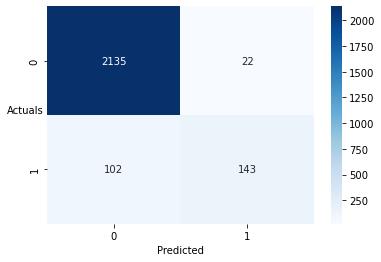

In [102]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

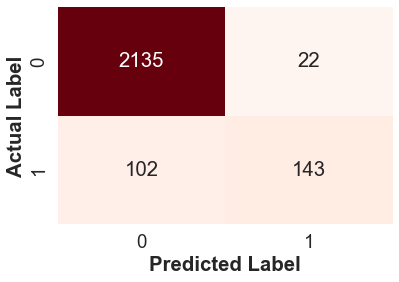

In [103]:
sns.set(font_scale=1.7)
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.show()
sns.set(font_scale=1)

In [104]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.954     0.990     0.972      2157
           1      0.867     0.584     0.698       245

    accuracy                          0.948      2402
   macro avg      0.911     0.787     0.835      2402
weighted avg      0.945     0.948     0.944      2402



## Prediction on the Data

Now, let us see the predicted probability values.

In [105]:
y_prob_pred_test = model_3.predict(Default_test)

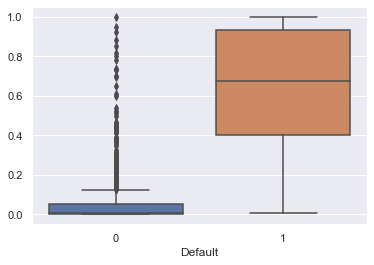

In [106]:
sns.boxplot(x=Default_test['default'],y=y_prob_pred_test)
plt.xlabel('Default');

In [107]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [108]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.952     0.982     0.967      1041
           1      0.829     0.643     0.724       143

    accuracy                          0.941      1184
   macro avg      0.891     0.813     0.846      1184
weighted avg      0.938     0.941     0.938      1184



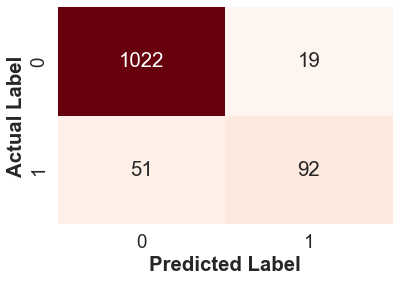

In [109]:
sns.set(font_scale=1.7)
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.show()
sns.set(font_scale=1)

#### Choosing the optimal threshold

In [110]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [111]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.15077508982575155

#### Validating on the train set with revised threshold

In [112]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.15:
        a=1
    else:
        a=0
    y_class_pred.append(a)

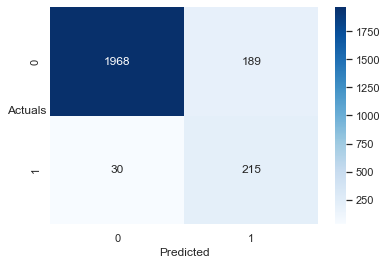

In [113]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

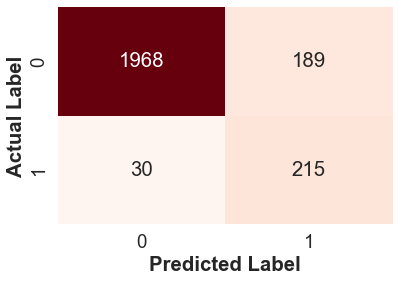

In [114]:
sns.set(font_scale=1.7)
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.show()
sns.set(font_scale=1)

Let us now go ahead and print the classification report to check the various other parameters.

In [115]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.985     0.912     0.947      2157
           1      0.532     0.878     0.663       245

    accuracy                          0.909      2402
   macro avg      0.759     0.895     0.805      2402
weighted avg      0.939     0.909     0.918      2402



#### Validating on the test set

In [116]:
y_prob_pred_test = model_3.predict(Default_test)

In [117]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.15:
        a=1
    else:
        a=0
    y_class_pred.append(a)

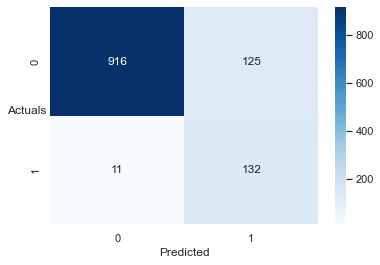

In [118]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

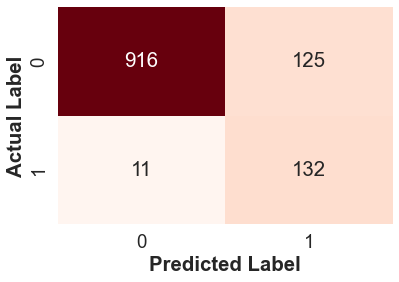

In [119]:
sns.set(font_scale=1.7)
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.show()
sns.set(font_scale=1)

In [120]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.988     0.880     0.931      1041
           1      0.514     0.923     0.660       143

    accuracy                          0.885      1184
   macro avg      0.751     0.902     0.795      1184
weighted avg      0.931     0.885     0.898      1184



In [121]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [122]:
Default_smote = pd.concat([X_res, y_res], axis = 1)

In [123]:
model_4 = SM.logit(formula = f_3, data=Default_smote).fit()

Optimization terminated successfully.
         Current function value: 0.250215
         Iterations 9


In [124]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3774
Model:                          Logit   Df Residuals:                     3762
Method:                           MLE   Df Model:                           11
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.6336
Time:                        20:01:34   Log-Likelihood:                -944.31
converged:                       True   LL-Null:                       -2577.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.2844      0.137    -23.953      0.000      -3.553      -3.016
Networth                               -1.2885      0.141     -9.157      0.000      -1.564      -1.013
Gross_Block_                            1.1403      0.135      8.459      0.000       0.876       1.404
Current_Liabilities_and_Provisions_     1.0015      0.132      7.589      0.000       0.743       1.260
PBIDT                                  -0.8447      0.131     -6.458      0.000      -1.101      -0.588
PBT                                     0.5339      0.114      4.679      0.000       0.310       0.757
Book_Value_Adj_Unit_Curr               -3.3192      0.179    -18.493      0.000      -3.671      -2.967
ROG_Net_Worth_perc                     -0.6359      0.094     -6.735      0.000      -0.821      -0.451
ROG_Capital_Employed_perc               0.3626      0.081      4.474      0.000       0.204       0.521
ROG_Cost_of_Production_perc            -0.3864      0.074     -5.229      0.000      -0.531      -0.242
Current_Ratio_Latest                   -1.3117      0.091    -14.412      0.000      -1.490      -1.133
Interest_Cover_Ratio_Latest            -0.8149      0.098     -8.335      0.000      -1.006      -0.623
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [125]:
model_4.pvalues.sort_values(ascending = False)

ROG_Capital_Employed_perc             0.00
PBT                                   0.00
ROG_Cost_of_Production_perc           0.00
PBIDT                                 0.00
ROG_Net_Worth_perc                    0.00
Current_Liabilities_and_Provisions_   0.00
Interest_Cover_Ratio_Latest           0.00
Gross_Block_                          0.00
Networth                              0.00
Current_Ratio_Latest                  0.00
Book_Value_Adj_Unit_Curr              0.00
Intercept                             0.00
dtype: float64

In [126]:
model_4.params.sort_values(ascending = False)

Gross_Block_                           1.14
Current_Liabilities_and_Provisions_    1.00
PBT                                    0.53
ROG_Capital_Employed_perc              0.36
ROG_Cost_of_Production_perc           -0.39
ROG_Net_Worth_perc                    -0.64
Interest_Cover_Ratio_Latest           -0.81
PBIDT                                 -0.84
Networth                              -1.29
Current_Ratio_Latest                  -1.31
Intercept                             -3.28
Book_Value_Adj_Unit_Curr              -3.32
dtype: float64

## Prediction on the Data

Now, let us see the predicted probability values.

In [127]:
y_prob_pred_train = model_4.predict(Default_smote
)

In [128]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

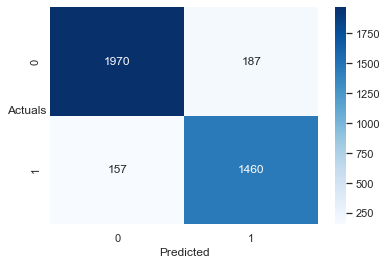

In [129]:
sns.heatmap((metrics.confusion_matrix(Default_smote['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

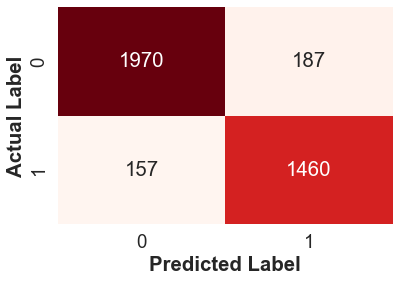

In [130]:
sns.set(font_scale=1.7)
sns.heatmap((metrics.confusion_matrix(Default_smote['default'],y_class_pred)),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.show()
sns.set(font_scale=1)

In [131]:
print(metrics.classification_report(Default_smote['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.926     0.913     0.920      2157
           1      0.886     0.903     0.895      1617

    accuracy                          0.909      3774
   macro avg      0.906     0.908     0.907      3774
weighted avg      0.909     0.909     0.909      3774



## Prediction on the Data

Now, let us see the predicted probability values.

In [132]:
y_prob_pred_test = model_4.predict(Default_test)

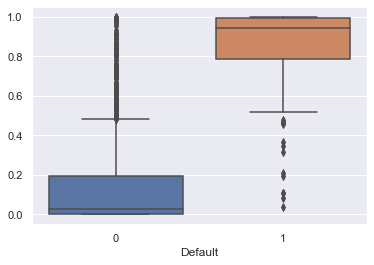

In [133]:
sns.boxplot(x=Default_test['default'],y=y_prob_pred_test)
plt.xlabel('Default');

In [134]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [135]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.879     0.929      1041
           1      0.508     0.909     0.652       143

    accuracy                          0.883      1184
   macro avg      0.747     0.894     0.791      1184
weighted avg      0.928     0.883     0.896      1184



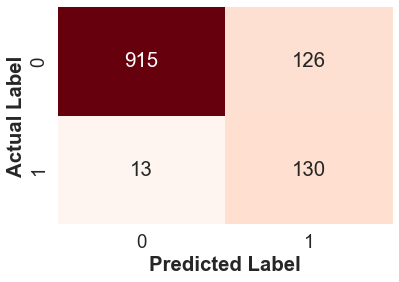

In [136]:
sns.set(font_scale=1.7)
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.show()
sns.set(font_scale=1)

In [143]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(Company[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(Company[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=Company[column],color='y');
    plt.show()

Description of Current_Liabilities_and_Provisions_
--------------------------------
count   3005.00
mean      20.41
std       33.57
min       -0.23
25%        0.36
50%        4.67
75%       23.50
max      162.47
Name: Current_Liabilities_and_Provisions_, dtype: float64 

Distribution of Current_Liabilities_and_Provisions_
-------------------------------------


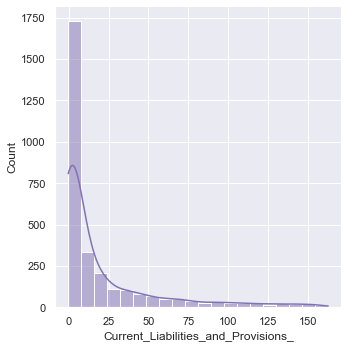

BoxPlot of Current_Liabilities_and_Provisions_
------------------------------


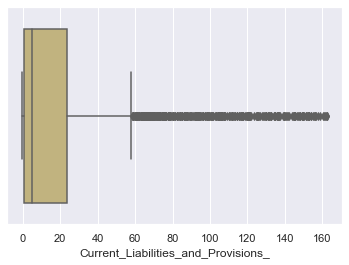

Description of Gross_Block_
--------------------------------
count   3046.00
mean      41.88
std       69.97
min      -41.19
25%        0.25
50%        7.91
75%       48.69
max      328.09
Name: Gross_Block_, dtype: float64 

Distribution of Gross_Block_
-------------------------------------


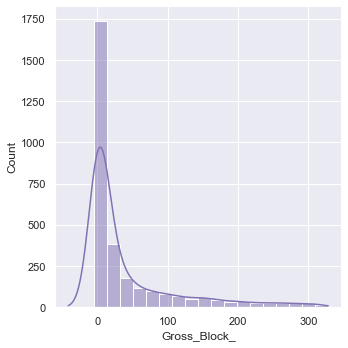

BoxPlot of Gross_Block_
------------------------------


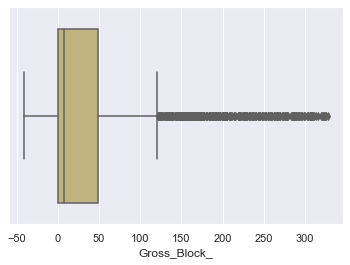

Description of PBT
--------------------------------
count   2645.00
mean       1.42
std        4.27
min      -11.24
25%       -0.03
50%        0.15
75%        1.65
max       18.58
Name: PBT, dtype: float64 

Distribution of PBT
-------------------------------------


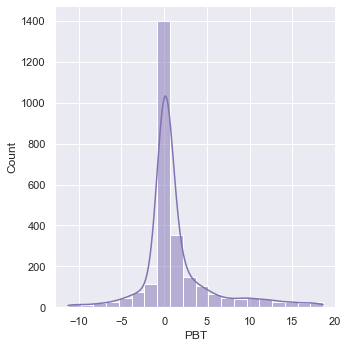

BoxPlot of PBT
------------------------------


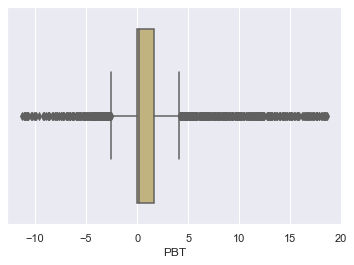

Description of ROG_Capital_Employed_perc
--------------------------------
count   3014.00
mean       2.84
std       11.55
min      -28.44
25%       -3.04
50%        0.93
75%        8.79
max       37.14
Name: ROG_Capital_Employed_perc, dtype: float64 

Distribution of ROG_Capital_Employed_perc
-------------------------------------


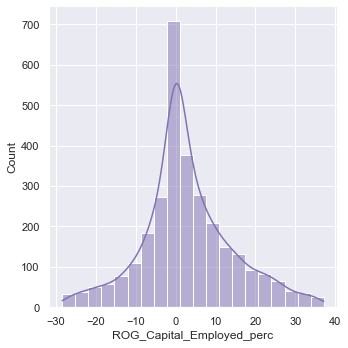

BoxPlot of ROG_Capital_Employed_perc
------------------------------


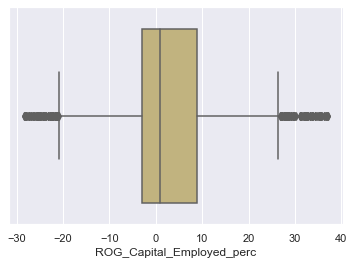

Description of ROG_Cost_of_Production_perc
--------------------------------
count   2911.00
mean       4.35
std       21.94
min      -52.60
25%       -4.92
50%        2.86
75%       16.32
max       68.40
Name: ROG_Cost_of_Production_perc, dtype: float64 

Distribution of ROG_Cost_of_Production_perc
-------------------------------------


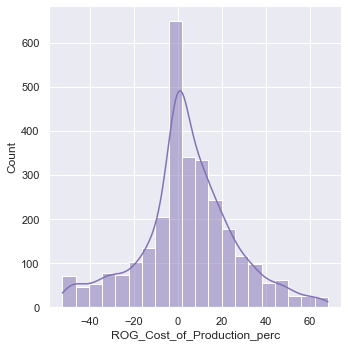

BoxPlot of ROG_Cost_of_Production_perc
------------------------------


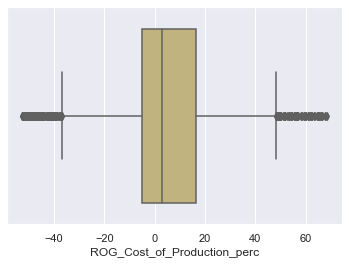

Description of ROG_Net_Worth_perc
--------------------------------
count   2839.00
mean       3.70
std        9.15
min      -20.63
25%       -0.21
50%        1.76
75%        8.24
max       30.59
Name: ROG_Net_Worth_perc, dtype: float64 

Distribution of ROG_Net_Worth_perc
-------------------------------------


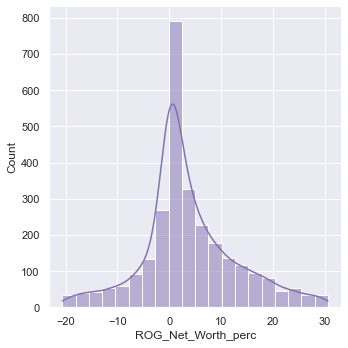

BoxPlot of ROG_Net_Worth_perc
------------------------------


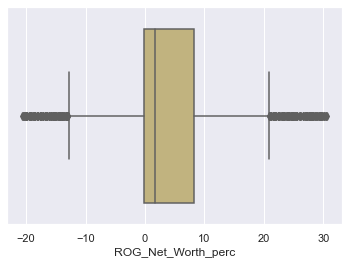

Description of Interest_Cover_Ratio_Latest
--------------------------------
count   2860.00
mean       1.25
std        2.22
min       -5.50
25%        0.00
50%        0.54
75%        2.10
max        9.25
Name: Interest_Cover_Ratio_Latest, dtype: float64 

Distribution of Interest_Cover_Ratio_Latest
-------------------------------------


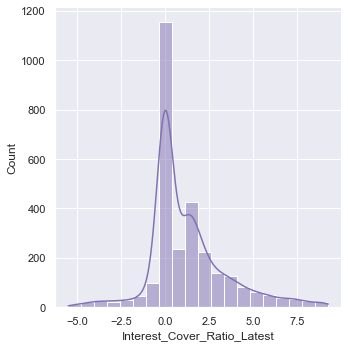

BoxPlot of Interest_Cover_Ratio_Latest
------------------------------


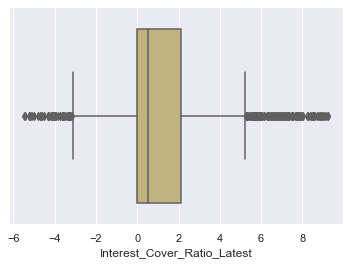

Description of PBIDT
--------------------------------
count   2915.00
mean       6.06
std       12.66
min      -33.41
25%        0.01
50%        0.84
75%        7.37
max       58.59
Name: PBIDT, dtype: float64 

Distribution of PBIDT
-------------------------------------


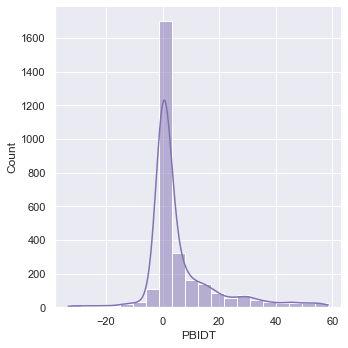

BoxPlot of PBIDT
------------------------------


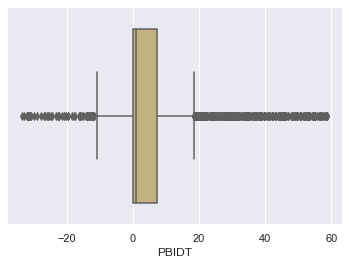

Description of Current_Ratio_Latest
--------------------------------
count   3020.00
mean       1.43
std        1.06
min        0.00
25%        0.79
50%        1.20
75%        1.78
max        5.57
Name: Current_Ratio_Latest, dtype: float64 

Distribution of Current_Ratio_Latest
-------------------------------------


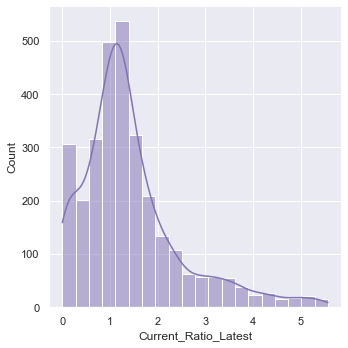

BoxPlot of Current_Ratio_Latest
------------------------------


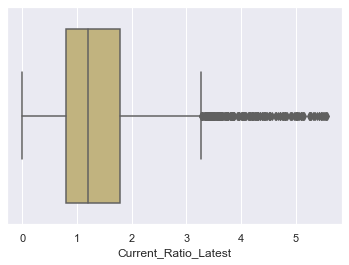

Description of Networth
--------------------------------
count   2936.00
mean      36.57
std       61.80
min     -162.01
25%        3.19
50%       12.32
75%       45.72
max      287.16
Name: Networth, dtype: float64 

Distribution of Networth
-------------------------------------


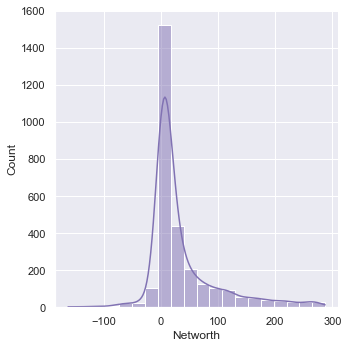

BoxPlot of Networth
------------------------------


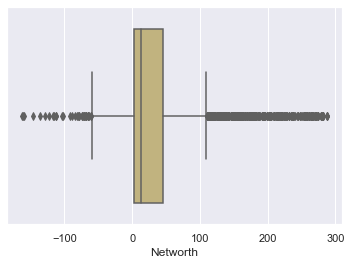

Description of Book_Value_Adj_Unit_Curr
--------------------------------
count   3096.00
mean      26.78
std       33.59
min      -70.64
25%        6.20
50%       15.22
75%       40.48
max      138.79
Name: Book_Value_Adj_Unit_Curr, dtype: float64 

Distribution of Book_Value_Adj_Unit_Curr
-------------------------------------


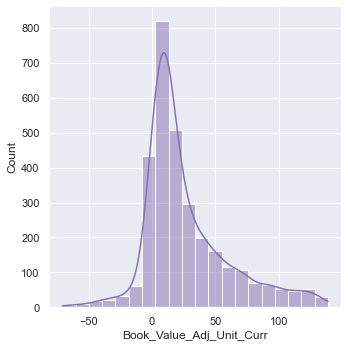

BoxPlot of Book_Value_Adj_Unit_Curr
------------------------------


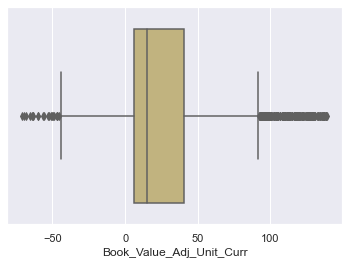

In [144]:
lstcolumns = ['Current_Liabilities_and_Provisions_', 'Gross_Block_', 'PBT', 'ROG_Capital_Employed_perc', 'ROG_Cost_of_Production_perc', 'ROG_Net_Worth_perc', 'Interest_Cover_Ratio_Latest', 'PBIDT', 'Current_Ratio_Latest', 'Networth', 'Book_Value_Adj_Unit_Curr']
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

In [145]:
df = Company[['Current_Liabilities_and_Provisions_', 'Gross_Block_', 'PBT', 'ROG_Capital_Employed_perc', 'ROG_Cost_of_Production_perc', 'ROG_Net_Worth_perc', 'Interest_Cover_Ratio_Latest', 'PBIDT', 'Current_Ratio_Latest', 'Networth', 'Book_Value_Adj_Unit_Curr']]

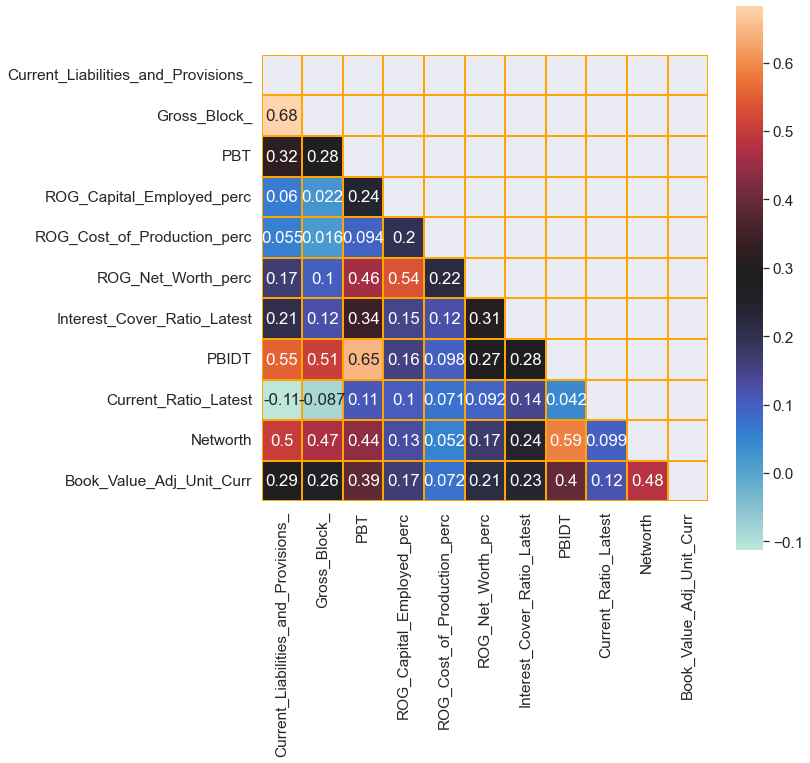

In [146]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

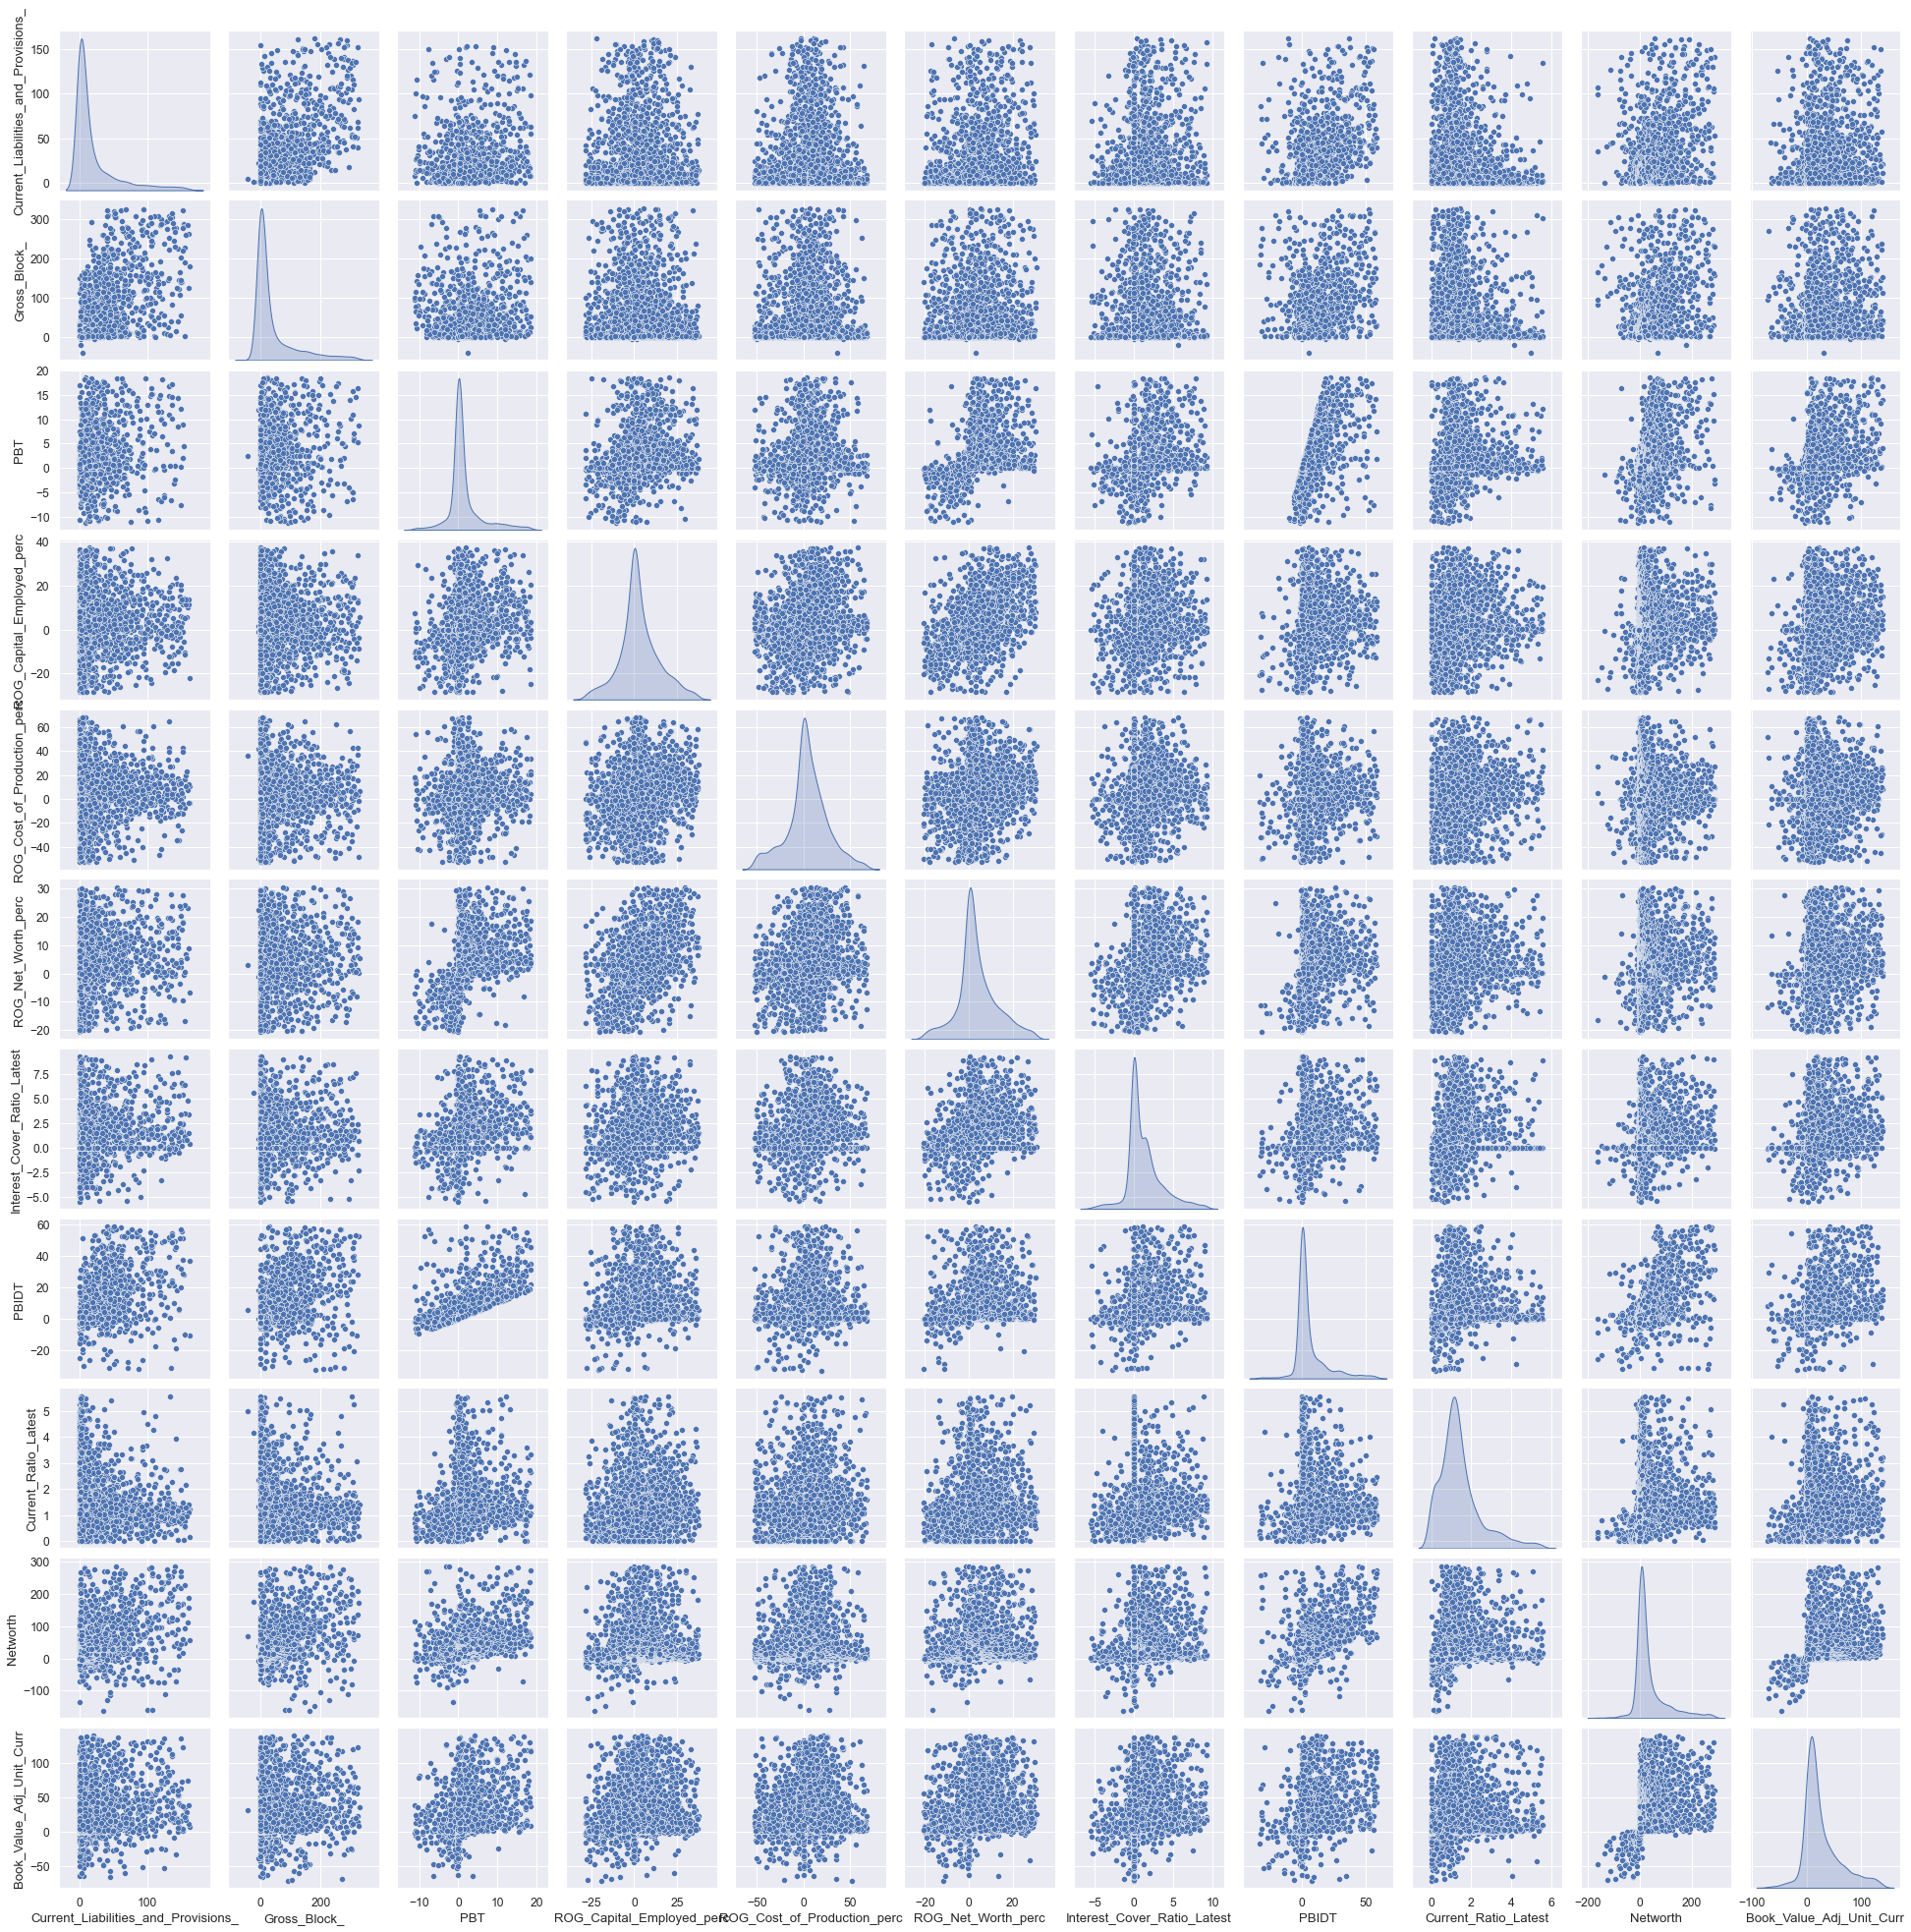

In [147]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde').savefig('out.jpg')
sns.set(font_scale=1)

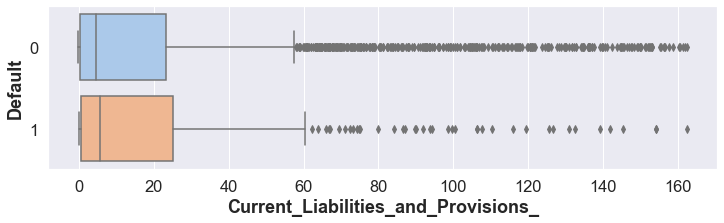

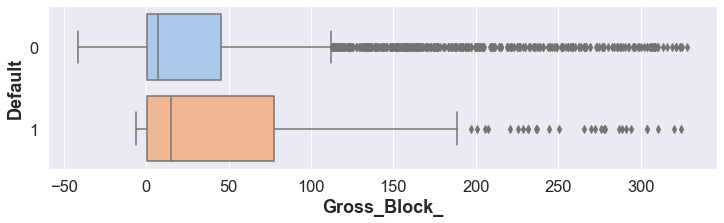

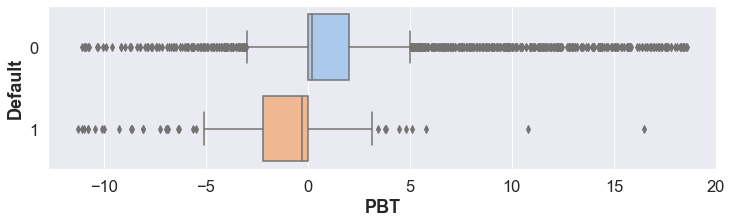

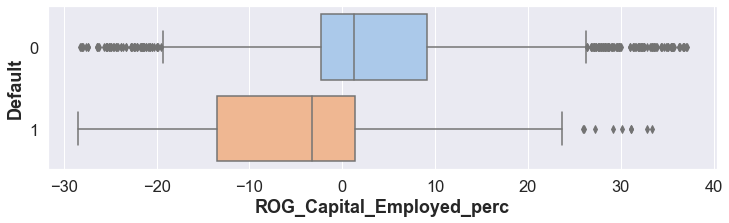

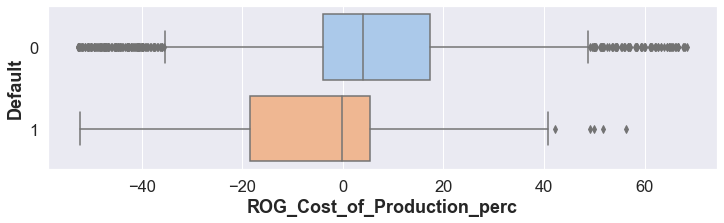

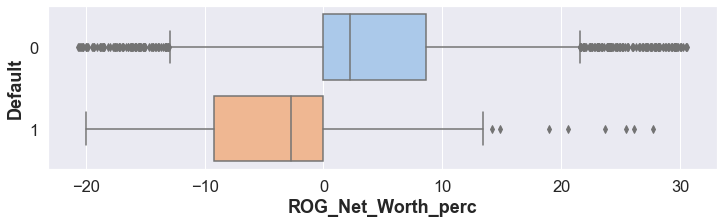

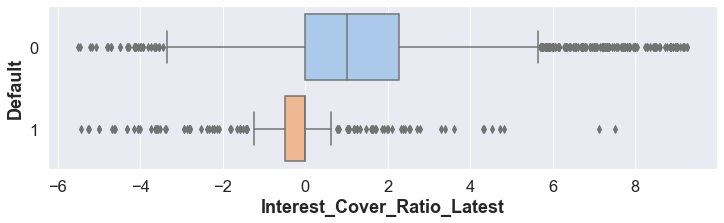

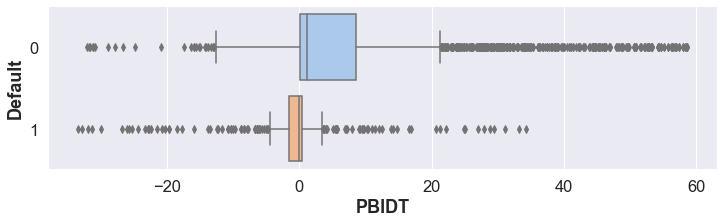

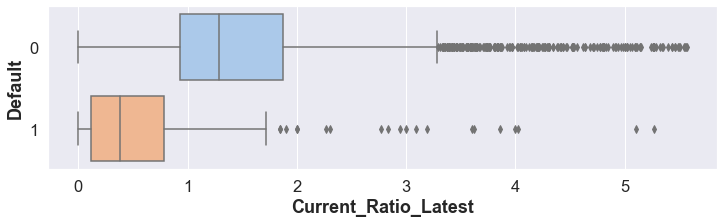

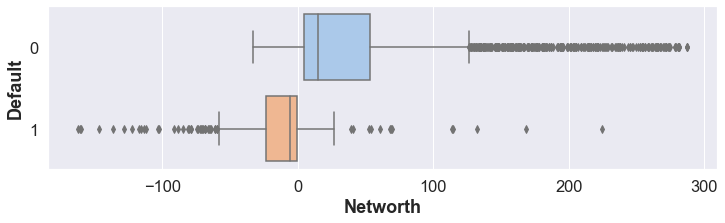

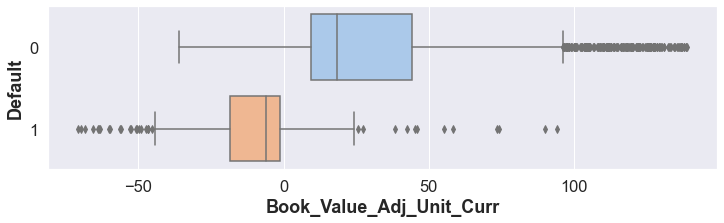

In [154]:
sns.set(font_scale=1.5)
lstcolumns = ['Current_Liabilities_and_Provisions_', 'Gross_Block_', 'PBT', 'ROG_Capital_Employed_perc', 'ROG_Cost_of_Production_perc', 'ROG_Net_Worth_perc', 'Interest_Cover_Ratio_Latest', 'PBIDT', 'Current_Ratio_Latest', 'Networth', 'Book_Value_Adj_Unit_Curr']
for val in lstcolumns:
        plt.figure(figsize=(12,3))
        sns.boxplot(x=df[val], y=Company_imputed['default'], palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('Default',weight="bold")
        plt.show()
sns.set(font_scale=1)

In [155]:
column = 'default'
print(column.upper(),': ',Company_imputed[column].nunique(),'unique values')
print('--------------------')
print(Company_imputed[column].value_counts())
print('\n',column.upper(),'(normalized)')
print('--------------------')
print(Company_imputed[column].value_counts(normalize=1))
print('\n*************************************************\n\n')

DEFAULT :  2 unique values
--------------------
0    3198
1     388
Name: default, dtype: int64

 DEFAULT (normalized)
--------------------
0   0.89
1   0.11
Name: default, dtype: float64

*************************************************




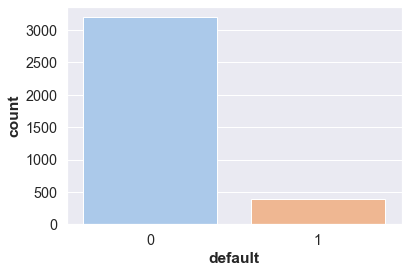

In [157]:
sns.set(font_scale=1.3)
sns.countplot(x=column, data=Company_imputed, palette='pastel')
plt.ylabel('count',weight="bold")
plt.xlabel(column,weight="bold")
plt.show()
sns.set(font_scale=1.0)